In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
import os
import statistics 
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

---

In [3]:
data = pd.read_csv('Dataframe_no_kinematics_no_zeros_paired_sorted.csv', sep=',')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Dataframe = data.rename(columns = {"Unnamed: 0" :  "Patients"} )
Dataframe = Dataframe.set_index('Patients')
print(Dataframe.shape)
Dataframe.head(8)

(100, 100)


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,HV1,HV2,KV1,KV2,AV1,Vfdt1,Vfdt2,HR1,HR2,HR3,THR1,THR2,HR4,HR5,HR6,THR4,THR5,HR7,HR8,HR9,THR7,THR8,H1,H2,H3,H4,H5,H6,H7,TH2,TH3,TH5,TH6,H8,H9,H10,H11,H12,H13,H14,TH9,TH10,TH12,TH13,H15,H16,H17,THR15,THR16,K1,K2,K3,K4,K5,K6,K7,TK2,TK3,TK5,TK6,K8,K9,K10,TK8,TK9,K11,K12,K13,TK11,TK12,A1,A2,A3,A4,A5,A6,A7,TA2,TA3,TA5,TA6,A8,A9,A10,TA8,TA9
Patients,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M_DR_L002M1NAAA,62.939427,37.060573,0.808100,46.982558,1.290000,46.565346,0.628290,36.528477,0.387120,22.506977,0.665000,90.270263,0.420000,0.203333,-50.426812,48.577973,35.941583,-29.979234,-52.914337,20.556150,15.670808,13.911333,4.891333,9.020000,65.314417,65.493083,3.427333,-0.712000,4.139333,43.864871,50.101670,6.104333,-6.724000,12.828333,37.747067,81.764006,27.918333,29.272333,2.820333,5.503667,32.282333,5.443000,29.462000,5.319579,56.005197,92.179787,63.723740,-2.564667,3.740667,-3.058667,2.913333,2.956667,-2.538000,7.075667,52.599067,4.951658,63.723740,92.814745,-2.036000,-14.436667,12.400667,69.604868,12.699688,18.315667,25.781667,12.124000,24.550667,28.845667,18.847000,16.721667,44.116860,36.654592,75.029092,100.000000,-1.509667,-7.521000,6.011333,67.332248,19.925628,-29.925667,-45.772667,15.847000,24.075474,54.462731,8.913667,15.461333,3.239333,4.687333,9.982000,3.802667,12.835333,48.494895,43.696704,83.989903,78.162672,13.941667,4.429000,9.512667,63.959892,9.353930
M_IZ_L002M1NAAA,67.182370,32.817630,0.865200,50.302326,1.280000,46.904616,0.675437,39.269578,0.456413,26.535659,0.623333,96.367229,0.476667,0.188333,-64.943045,82.060669,148.180082,-93.381112,-86.162162,15.373675,68.845202,12.732667,4.039000,8.693667,16.581212,49.826773,1.167000,-3.846667,5.013667,64.465667,10.877351,6.602667,-8.045333,14.648000,58.553946,29.210998,35.185000,35.448667,-2.369667,7.823000,36.402667,7.823000,40.371000,1.317523,56.572909,88.970343,67.182370,-3.546333,0.254667,-6.599000,-5.194667,-2.978000,-9.322333,9.712667,56.002198,34.233008,84.048654,76.009327,-3.850333,-17.192333,13.342000,54.019947,34.866632,23.634000,42.790333,14.276667,43.693000,53.982000,16.614667,40.413333,66.791498,41.942745,74.856549,97.969523,-0.725667,-7.867667,7.142000,93.828354,28.290969,-16.115667,-33.220333,17.104667,5.977438,96.372685,6.952667,15.450667,-3.035667,-1.680333,11.460667,-5.942000,21.860667,49.655097,46.033977,90.285420,70.249037,13.016333,5.810333,7.206000,70.498242,43.120670
M_DR_L002M2NAAA,57.795502,42.204498,1.170233,68.036822,1.158333,51.884896,1.011775,58.824138,0.545543,31.717636,0.578333,103.933130,0.443333,0.166667,-80.752790,87.281707,104.920805,-41.142917,-79.064595,9.458853,37.565107,16.320333,6.492000,9.828333,51.723752,80.010372,3.605667,-3.042667,6.648333,36.441226,8.800351,3.858333,-6.792667,10.651000,48.513463,67.591418,33.288667,34.551333,-4.308667,-0.959000,40.204667,-1.197333,44.513333,4.555078,51.619632,95.663640,60.585517,-3.554333,5.323000,-4.894333,3.798333,4.334000,-2.834000,10.309667,47.247676,4.804285,65.345070,93.741497,15.168333,1.602667,13.565667,53.927749,12.218556,13.859667,25.089667,6.982667,25.876333,29.834000,15.538000,22.851333,57.363128,38.598409,70.035353,100.000000,6.809333,0.394000,6.415333,79.291010,35.036187,-7.165000,-22.118667,14.953667,14.923588,51.548338,9.242333,14.664667,0.738000,2.312333,13.835333,1.972000,14.460000,38.444989,39.289854,86.348504,58.529717,-10.233667,-23.182333,12.948667,68.541686,27.807999
M_IZ_L002M2NAAA,62.615632,37.384368,1.116753,64.927519,1.185000,50.658932,0.942554,54.799654,0.585027,34.013178,0.610000,98.373984,0.488333,0.090000,-89.992005,87.076785,163.870160,-98.302135,-112.325769,21.863426,60.706636,16.310667,7.472667,8.838000,28.252204,57.899666,2.486000,-3.813667,6.299667,45.597154,90.769699,7.017000,-2.361333,9.378333,22.665109,60.157482,37.996667,40.337667,-6.672333,1.141333,35.394667,1.141333,47.010000,5.325627,52.904906,91.857129,62.615632,-9.335000,0.296333,-9.662667,-3.245000,-3

In [6]:
Dataframe_2 = Dataframe.round(4)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Dataframe_2.head(8)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,HV1,HV2,KV1,KV2,AV1,Vfdt1,Vfdt2,HR1,HR2,HR3,THR1,THR2,HR4,HR5,HR6,THR4,THR5,HR7,HR8,HR9,THR7,THR8,H1,H2,H3,H4,H5,H6,H7,TH2,TH3,TH5,TH6,H8,H9,H10,H11,H12,H13,H14,TH9,TH10,TH12,TH13,H15,H16,H17,THR15,THR16,K1,K2,K3,K4,K5,K6,K7,TK2,TK3,TK5,TK6,K8,K9,K10,TK8,TK9,K11,K12,K13,TK11,TK12,A1,A2,A3,A4,A5,A6,A7,TA2,TA3,TA5,TA6,A8,A9,A10,TA8,TA9
Patients,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M_DR_L002M1NAAA,62.9394,37.0606,0.8081,46.9826,1.2900,46.5653,0.6283,36.5285,0.3871,22.5070,0.6650,90.2703,0.4200,0.2033,-50.4268,48.5780,35.9416,-29.9792,-52.9143,20.5562,15.6708,13.9113,4.8913,9.0200,65.3144,65.4931,3.4273,-0.7120,4.1393,43.8649,50.1017,6.1043,-6.7240,12.8283,37.7471,81.7640,27.9183,29.2723,2.8203,5.5037,32.2823,5.4430,29.4620,5.3196,56.0052,92.1798,63.7237,-2.5647,3.7407,-3.0587,2.9133,2.9567,-2.5380,7.0757,52.5991,4.9517,63.7237,92.8147,-2.0360,-14.4367,12.4007,69.6049,12.6997,18.3157,25.7817,12.1240,24.5507,28.8457,18.8470,16.7217,44.1169,36.6546,75.0291,100.0000,-1.5097,-7.5210,6.0113,67.3322,19.9256,-29.9257,-45.7727,15.8470,24.0755,54.4627,8.9137,15.4613,3.2393,4.6873,9.9820,3.8027,12.8353,48.4949,43.6967,83.9899,78.1627,13.9417,4.4290,9.5127,63.9599,9.3539
M_IZ_L002M1NAAA,67.1824,32.8176,0.8652,50.3023,1.2800,46.9046,0.6754,39.2696,0.4564,26.5357,0.6233,96.3672,0.4767,0.1883,-64.9430,82.0607,148.1801,-93.3811,-86.1622,15.3737,68.8452,12.7327,4.0390,8.6937,16.5812,49.8268,1.1670,-3.8467,5.0137,64.4657,10.8774,6.6027,-8.0453,14.6480,58.5539,29.2110,35.1850,35.4487,-2.3697,7.8230,36.4027,7.8230,40.3710,1.3175,56.5729,88.9703,67.1824,-3.5463,0.2547,-6.5990,-5.1947,-2.9780,-9.3223,9.7127,56.0022,34.2330,84.0487,76.0093,-3.8503,-17.1923,13.3420,54.0199,34.8666,23.6340,42.7903,14.2767,43.6930,53.9820,16.6147,40.4133,66.7915,41.9427,74.8565,97.9695,-0.7257,-7.8677,7.1420,93.8284,28.2910,-16.1157,-33.2203,17.1047,5.9774,96.3727,6.9527,15.4507,-3.0357,-1.6803,11.4607,-5.9420,21.8607,49.6551,46.0340,90.2854,70.2490,13.0163,5.8103,7.2060,70.4982,43.1207
M_DR_L002M2NAAA,57.7955,42.2045,1.1702,68.0368,1.1583,51.8849,1.0118,58.8241,0.5455,31.7176,0.5783,103.9331,0.4433,0.1667,-80.7528,87.2817,104.9208,-41.1429,-79.0646,9.4589,37.5651,16.3203,6.4920,9.8283,51.7238,80.0104,3.6057,-3.0427,6.6483,36.4412,8.8004,3.8583,-6.7927,10.6510,48.5135,67.5914,33.2887,34.5513,-4.3087,-0.9590,40.2047,-1.1973,44.5133,4.5551,51.6196,95.6636,60.5855,-3.5543,5.3230,-4.8943,3.7983,4.3340,-2.8340,10.3097,47.2477,4.8043,65.3451,93.7415,15.1683,1.6027,13.5657,53.9277,12.2186,13.8597,25.0897,6.9827,25.8763,29.8340,15.5380,22.8513,57.3631,38.5984,70.0354,100.0000,6.8093,0.3940,6.4153,79.2910,35.0362,-7.1650,-22.1187,14.9537,14.9236,51.5483,9.2423,14.6647,0.7380,2.3123,13.8353,1.9720,14.4600,38.4450,39.2899,86.3485,58.5297,-10.2337,-23.1823,12.9487,68.5417,27.8080
M_IZ_L002M2NAAA,62.6156,37.3844,1.1168,64.9275,1.1850,50.6589,0.9426,54.7997,0.5850,34.0132,0.6100,98.3740,0.4883,0.0900,-89.9920,87.0768,163.8702,-98.3021,-112.3258,21.8634,60.7066,16.3107,7.4727,8.8380,28.2522,57.8997,2.4860,-3.8137,6.2997,45.5972,90.7697,7.0170,-2.3613,9.3783,22.6651,60.1575,37.9967,40.3377,-6.6723,1.1413,35.3947,1.1413,47.0100,5.3256,52.9049,91.8571,62.6156,-9.3350,0.2963,-9.6627,-3.2450,-3.2450,-8.6177,10.0137,53.9848,2.3665,62.6156,84.0556,-2.7137,-15.8647,13.1510,33.0460,26.1482,15.4580,31.9877,3.1703,31.4400,46.3833,9.5337,43.2130,45.3868,41.6622,69.6454,97.6255,5.0650,-1.9053,6.9703,69.7683,51.3048,18.9943,2.7443,16.2500,9.6999,85.5645,5.0373,13.1010,-7.1187,-6.9060,10.1693,-8.5393,21.8007,43.9386,42.9961,87.3712,63.5960,-4.3250,-20.8550,16.5300,65.0812,35.2752
M_DR_L022M1NAAA,66.6568,33.3432,0.7932,45.3280,1.2583,47.7191,0.6296,35.9777,0.3658,20.9046,0.5867,102.3040,0.4350,0.2433,-43.7768,71.5880,158.9537,-140.1218,-34.8795,21.3140,31.6397,25.4797,19.8457,5.6340,12.9112,53.6055,1.5927,-1.8330,3.4257,66.3322,47.5544,1.5277,-6.7267,8.2543,16.6546,81.1935,44.7073,44.7190,13.1

In [3]:
list_patients_data = []
for l in Dataframe.index:
     list_patients_data.append(l)
#print(list_patients_data)

In [4]:
# Prueba de index
print(list_patients_data[0][5:])
print('')
print(list_patients_data[0][0:4])
print('')


list_patients_data_M_DR = []
for i in range(len(list_patients_data)):
    if list_patients_data[i][0:4] == 'M_DR':
        list_patients_data_M_DR.append(list_patients_data[i])

L002M1NAAA

M_DR



In [5]:
print(len(list_patients_data_M_DR))
print(list_patients_data_M_DR[0:10])

50
['M_DR_L002M1NAAA', 'M_DR_L002M2NAAA', 'M_DR_L022M1NAAA', 'M_DR_L031M1NAAA', 'M_DR_L031M3NAAA', 'M_DR_L034M1NAAA', 'M_DR_L035M1NAAA', 'M_DR_L036M1NAAA', 'M_DR_L038M1NAAA', 'M_DR_L040M1NAAA']


In [6]:
Labels = pd.read_excel('Base datos clinica clustering.xlsx')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
drop_columns = []
for i in Labels.columns[13:]:
    drop_columns.append(i)
drop_axis = []
Labels.drop(drop_columns, inplace=True, axis=1)
Labels = Labels[:40]
print(len(Labels['ID']))
Labels[['ID','ASIA', 'NIVEL LESION']].head(5)

40


,ID,ASIA,NIVEL LESION
0,L031M3NAAA,D,C7
1,L043M2NAAA,BC,C6
2,L043M3NAAA,D,C6
3,L076M3NAAA,D,C4
4,L077M1NAAA,d,C4


In [7]:
list_patients_label = []
for j in Labels.ID:
    list_patients_label.append(j)
print(list_patients_label[0:8]) 
print(list_patients_label[-5:-1]) 

['L031M3NAAA', 'L043M2NAAA', 'L043M3NAAA', 'L076M3NAAA', 'L077M1NAAA', 'L080M1NAAA', 'L085M2NAAA', 'L091M2NAAA']
["'M_DR_L065M1NAAA'", "'M_DR_L083M1NAAA'", "'M_DR_L087M2NAAA'", "'M_DR_L092M1NAAA'"]


In [8]:
print(len(list_patients_label))
print('list_patients_label = ', list_patients_label[0:10])
print('..................... ', list_patients_label[34:])
new_list_patients_label = list_patients_label[0:34]
print('')
print('new_list_patients_label = ', new_list_patients_label[0:8])
print('..................... ', new_list_patients_label[-5:])
print(len(new_list_patients_label))

#print('')
#new_new_list_patients_label = list_patients_label[34:]
#print(new_new_list_patients_label)
#print(len(new_new_list_patients_label))

40
list_patients_label =  ['L031M3NAAA', 'L043M2NAAA', 'L043M3NAAA', 'L076M3NAAA', 'L077M1NAAA', 'L080M1NAAA', 'L085M2NAAA', 'L091M2NAAA', 'L139M1NAAA', 'L148M1NAAA']
.....................  ["'M_DR_L038M2NAAA'", "'M_DR_L065M1NAAA'", "'M_DR_L083M1NAAA'", "'M_DR_L087M2NAAA'", "'M_DR_L092M1NAAA'", "'M_DR_L106M2NAAA'"]

new_list_patients_label =  ['L031M3NAAA', 'L043M2NAAA', 'L043M3NAAA', 'L076M3NAAA', 'L077M1NAAA', 'L080M1NAAA', 'L085M2NAAA', 'L091M2NAAA']
.....................  ['L315M3NAAA', 'L324M1NAAA', 'L351M1NAAA', 'L356M1NAAA', 'L357M1NAAA']
34


In [9]:
# Checking !¡
Lista_no_encontrados = []
counter = 0
for i in list_patients_data_M_DR:
    if i[5:] in new_list_patients_label:
        print('Checked : ', i, ' --> ', i[5:])
        counter += 1
    else:
        Lista_no_encontrados.append(i)

Checked :  M_DR_L031M3NAAA  -->  L031M3NAAA
Checked :  M_DR_L043M2NAAA  -->  L043M2NAAA
Checked :  M_DR_L043M3NAAA  -->  L043M3NAAA
Checked :  M_DR_L076M3NAAA  -->  L076M3NAAA
Checked :  M_DR_L077M1NAAA  -->  L077M1NAAA
Checked :  M_DR_L080M1NAAA  -->  L080M1NAAA
Checked :  M_DR_L085M2NAAA  -->  L085M2NAAA
Checked :  M_DR_L091M2NAAA  -->  L091M2NAAA
Checked :  M_DR_L139M1NAAA  -->  L139M1NAAA
Checked :  M_DR_L148M1NAAA  -->  L148M1NAAA
Checked :  M_DR_L148M6NAAA  -->  L148M6NAAA
Checked :  M_DR_L157M1NAAA  -->  L157M1NAAA
Checked :  M_DR_L157M2NAAA  -->  L157M2NAAA
Checked :  M_DR_L157M3NAAA  -->  L157M3NAAA
Checked :  M_DR_L157M4NAAA  -->  L157M4NAAA
Checked :  M_DR_L157M5NAAA  -->  L157M5NAAA
Checked :  M_DR_L162M1NAAA  -->  L162M1NAAA
Checked :  M_DR_L180M1NAAA  -->  L180M1NAAA
Checked :  M_DR_L195M1NAAA  -->  L195M1NAAA
Checked :  M_DR_L199M2NAAA  -->  L199M2NAAA
Checked :  M_DR_L201M1NAAA  -->  L201M1NAAA
Checked :  M_DR_L206M1NAAA  -->  L206M1NAAA
Checked :  M_DR_L206M2NAAA  --> 

In [10]:
print(len(list_patients_data_M_DR))
print('Encontrados : ', counter)
print('No encontrados : ', len(Lista_no_encontrados))

50
Encontrados :  34
No encontrados :  16


In [11]:
print('No encontrados : ')
for i in Lista_no_encontrados:
    print(i, ' : ', i[5:])

No encontrados : 
M_DR_L002M1NAAA  :  L002M1NAAA
M_DR_L002M2NAAA  :  L002M2NAAA
M_DR_L022M1NAAA  :  L022M1NAAA
M_DR_L031M1NAAA  :  L031M1NAAA
M_DR_L034M1NAAA  :  L034M1NAAA
M_DR_L035M1NAAA  :  L035M1NAAA
M_DR_L036M1NAAA  :  L036M1NAAA
M_DR_L038M1NAAA  :  L038M1NAAA
M_DR_L040M1NAAA  :  L040M1NAAA
M_DR_L041M1NAAA  :  L041M1NAAA
M_DR_L050M1NAAA  :  L050M1NAAA
M_DR_L052M2NAAA  :  L052M2NAAA
M_DR_L059M1NAAA  :  L059M1NAAA
M_DR_L060M1NAAA  :  L060M1NAAA
M_DR_L035M3NAAA  :  L035M3NAAA
M_DR_L374M1NAAA  :  L374M1NAAA


In [12]:
Labels_2 = pd.read_excel('Pacientes_no_encontrados_Raul.xlsx')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
drop_columns = []
for i in Labels_2.columns[13:]:
    drop_columns.append(i)
drop_axis = []
Labels_2.drop(drop_columns, inplace=True, axis=1)
#Labels_2 = Labels_2[:58]
print('Rest of labels : ',Labels_2.shape)
print('Previous labels : ',Labels.shape)
Labels_2[['ID','ASIA', 'NIVEL LESION']].head(6)

Rest of labels :  (16, 13)
Previous labels :  (40, 13)


,ID,ASIA,NIVEL LESION
0,"0,M_DR_L002M1NAAA",D,C7
1,"1,M_DR_L002M2NAAA",D,C7
2,"2,M_DR_L022M1NAAA",D,C6
3,"3,M_DR_L031M1NAAA",D,C5
4,"4,M_DR_L034M1NAAA",NS,NS
5,"5,M_DR_L035M1NAAA",NaN,NaN


In [13]:
list_patients_label_2 = []
for j in Labels_2.ID:
    list_patients_label_2.append(j[-15:])
print(list_patients_label_2[0:5]) 

['M_DR_L002M1NAAA', 'M_DR_L002M2NAAA', 'M_DR_L022M1NAAA', 'M_DR_L031M1NAAA', 'M_DR_L034M1NAAA']


In [14]:
print(Lista_no_encontrados)

['M_DR_L002M1NAAA', 'M_DR_L002M2NAAA', 'M_DR_L022M1NAAA', 'M_DR_L031M1NAAA', 'M_DR_L034M1NAAA', 'M_DR_L035M1NAAA', 'M_DR_L036M1NAAA', 'M_DR_L038M1NAAA', 'M_DR_L040M1NAAA', 'M_DR_L041M1NAAA', 'M_DR_L050M1NAAA', 'M_DR_L052M2NAAA', 'M_DR_L059M1NAAA', 'M_DR_L060M1NAAA', 'M_DR_L035M3NAAA', 'M_DR_L374M1NAAA']


In [15]:
# Checking !¡
Lista_no_encontrados_2 = []
counter = 0
for i in Lista_no_encontrados:
    if i in list_patients_label_2 :
        counter += 1
    else:
        Lista_no_encontrados_2.append(i)
print('Encontrados : ', counter)
print('No encontrados : ',len(Lista_no_encontrados_2))

Encontrados :  16
No encontrados :  0


---

### Dataframe ASIA y Nivel de lesión de los pacientes

In [16]:
data = pd.read_csv('Dataframe_no_kinematics_no_zeros_paired_sorted.csv', sep=',')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Dataframe = data.rename(columns = {"Unnamed: 0" :  "Patients"} )
Patients = Dataframe["Patients"].to_list()
print('All patients : ', len(Patients))
Patients_R = []
for i in Patients:
    if i[0:4] == 'M_DR':
        Patients_R.append(i[-10:])
#print(Patients_R)
print('Just DR patients : ', len(Patients_R))

All patients :  100
Just DR patients :  50


In [17]:
Dataframe.head(2)

,Patients,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,HV1,HV2,KV1,KV2,AV1,Vfdt1,Vfdt2,HR1,HR2,HR3,THR1,THR2,HR4,HR5,HR6,THR4,THR5,HR7,HR8,HR9,THR7,THR8,H1,H2,H3,H4,H5,H6,H7,TH2,TH3,TH5,TH6,H8,H9,H10,H11,H12,H13,H14,TH9,TH10,TH12,TH13,H15,H16,H17,THR15,THR16,K1,K2,K3,K4,K5,K6,K7,TK2,TK3,TK5,TK6,K8,K9,K10,TK8,TK9,K11,K12,K13,TK11,TK12,A1,A2,A3,A4,A5,A6,A7,TA2,TA3,TA5,TA6,A8,A9,A10,TA8,TA9
0,M_DR_L002M1NAAA,62.939427,37.060573,0.8081,46.982558,1.29,46.565346,0.628290,36.528477,0.387120,22.506977,0.665000,90.270263,0.420000,0.203333,-50.426812,48.577973,35.941583,-29.979234,-52.914337,20.556150,15.670808,13.911333,4.891333,9.020000,65.314417,65.493083,3.427333,-0.712000,4.139333,43.864871,50.101670,6.104333,-6.724000,12.828333,37.747067,81.764006,27.918333,29.272333,2.820333,5.503667,32.282333,5.443,29.462,5.319579,56.005197,92.179787,63.72374,-2.564667,3.740667,-3.058667,2.913333,2.956667,-2.538000,7.075667,52.599067,4.951658,63.723740,92.814745,-2.036000,-14.436667,12.400667,69.604868,12.699688,18.315667,25.781667,12.124000,24.550667,28.845667,18.847000,16.721667,44.116860,36.654592,75.029092,100.000000,-1.509667,-7.521000,6.011333,67.332248,19.925628,-29.925667,-45.772667,15.847000,24.075474,54.462731,8.913667,15.461333,3.239333,4.687333,9.982000,3.802667,12.835333,48.494895,43.696704,83.989903,78.162672,13.941667,4.429000,9.512667,63.959892,9.35393
1,M_IZ_L002M1NAAA,67.182370,32.817630,0.8652,50.302326,1.28,46.904616,0.675437,39.269578,0.456413,26.535659,0.623333,96.367229,0.476667,0.188333,-64.943045,82.060669,148.180082,-93.381112,-86.162162,15.373675,68.845202,12.732667,4.039000,8.693667,16.581212,49.826773,1.167000,-3.846667,5.013667,64.465667,10.877351,6.602667,-8.045333,14.648000,58.553946,29.210998,35.185000,35.448667,-2.369667,7.823000,36.402667,7.823,40.371,1.317523,56.572909,88.970343,67.18237,-3.546333,0.254667,-6.599000,-5.194667,-2.978000,-9.322333,9.712667,56.002198,34.233008,84.048654,76.009327,-3.850333,-17.192333,13.342000,54.019947,34.866632,23.634000,42.790333,14.276667,43.693000,53.982000,16.614667,40.413333,66.791498,41.942745,74.856549,97.969523,-0.725667,-7.867667,7.142000,93.828354,28.290969,-16.115667,-33.220333,17.104667,5.977438,96.372685,6.952667,15.450667,-3.035667,-1.680333,11.460667,-5.942000,21.860667,49.655097,46.033977,90.285420,70.249037,13.016333,5.810333,7.206000,70.498242,43.12067


In [18]:
Labels = pd.read_excel('Base datos clinica clustering.xlsx')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
drop_columns = []
for i in Labels.columns[13:]:
    drop_columns.append(i)
drop_axis = []
Labels.drop(drop_columns, inplace=True, axis=1)
Labels = Labels[:34]
print('Labels shape 1 ',Labels.shape)
Labels[['ID','ASIA', 'NIVEL LESION']].head(6)

Labels shape 1  (34, 13)


,ID,ASIA,NIVEL LESION
0,L031M3NAAA,D,C7
1,L043M2NAAA,BC,C6
2,L043M3NAAA,D,C6
3,L076M3NAAA,D,C4
4,L077M1NAAA,d,C4
5,L080M1NAAA,NS,NaN


In [19]:
Labels_2 = pd.read_excel('Pacientes_no_encontrados_Raul.xlsx')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
drop_columns = []
for i in Labels_2.columns[13:]:
    drop_columns.append(i)
drop_axis = []
Labels_2.drop(drop_columns, inplace=True, axis=1)

ID_labels_2 = Labels_2['ID'].to_list()
print('Labels shape 2 ',Labels_2.shape)
Labels_2[['ID','ASIA', 'NIVEL LESION']].head(6)

Labels shape 2  (16, 13)


,ID,ASIA,NIVEL LESION
0,"0,M_DR_L002M1NAAA",D,C7
1,"1,M_DR_L002M2NAAA",D,C7
2,"2,M_DR_L022M1NAAA",D,C6
3,"3,M_DR_L031M1NAAA",D,C5
4,"4,M_DR_L034M1NAAA",NS,NS
5,"5,M_DR_L035M1NAAA",NaN,NaN


In [20]:
ID_labels_2_new = []
for i in ID_labels_2:
    ID_labels_2_new.append(i[-10:])
print(ID_labels_2_new)

['L002M1NAAA', 'L002M2NAAA', 'L022M1NAAA', 'L031M1NAAA', 'L034M1NAAA', 'L035M1NAAA', 'L036M1NAAA', 'L038M1NAAA', 'L040M1NAAA', 'L041M1NAAA', 'L050M1NAAA', 'L052M2NAAA', 'L059M1NAAA', 'L060M1NAAA', 'L035M3NAAA', 'L374M1NAAA']


In [21]:
Labels_2.drop('ID', axis = 1, inplace = True)
Labels_2['ID'] = ID_labels_2_new
Labels_2[['ID','ASIA', 'NIVEL LESION']].head(2)

,ID,ASIA,NIVEL LESION
0,L002M1NAAA,D,C7
1,L002M2NAAA,D,C7


In [22]:
#Labels_both.drop(Labels.index, inplace=True)    To reset dataframe
databases_label = [Labels, Labels_2]
Labels_both = pd.concat(databases_label)
print(Labels_both.shape)
#Labels_both[['ID','ASIA', 'NIVEL LESION']].head()

(50, 13)


In [23]:
print(Patients_R)                      # Not same order !¡
print('')
print(Labels_both['ID'].to_list())

['L002M1NAAA', 'L002M2NAAA', 'L022M1NAAA', 'L031M1NAAA', 'L031M3NAAA', 'L034M1NAAA', 'L035M1NAAA', 'L036M1NAAA', 'L038M1NAAA', 'L040M1NAAA', 'L041M1NAAA', 'L043M2NAAA', 'L043M3NAAA', 'L050M1NAAA', 'L052M2NAAA', 'L059M1NAAA', 'L060M1NAAA', 'L076M3NAAA', 'L077M1NAAA', 'L080M1NAAA', 'L085M2NAAA', 'L091M2NAAA', 'L139M1NAAA', 'L148M1NAAA', 'L148M6NAAA', 'L157M1NAAA', 'L157M2NAAA', 'L157M3NAAA', 'L157M4NAAA', 'L157M5NAAA', 'L162M1NAAA', 'L180M1NAAA', 'L195M1NAAA', 'L199M2NAAA', 'L201M1NAAA', 'L206M1NAAA', 'L206M2NAAA', 'L217M1NAAA', 'L260M1NAAA', 'L265M1NAAA', 'L271M1NAAA', 'L285M1NAAA', 'L288M1NAAA', 'L315M3NAAA', 'L324M1NAAA', 'L351M1NAAA', 'L356M1NAAA', 'L357M1NAAA', 'L035M3NAAA', 'L374M1NAAA']

['L031M3NAAA', 'L043M2NAAA', 'L043M3NAAA', 'L076M3NAAA', 'L077M1NAAA', 'L080M1NAAA', 'L085M2NAAA', 'L091M2NAAA', 'L139M1NAAA', 'L148M1NAAA', 'L148M6NAAA', 'L157M1NAAA', 'L157M2NAAA', 'L157M3NAAA', 'L157M4NAAA', 'L157M5NAAA', 'L162M1NAAA', 'L180M1NAAA', 'L195M1NAAA', 'L199M2NAAA', 'L201M1NAAA', 'L2

In [24]:
Labels_both = Labels_both.set_index('ID')
Labels_sorted = Labels_both.loc[Patients_R]

In [25]:
print('First 5 patients from Dataframe : ', Patients_R[0:5])
pd.set_option('display.max_rows', None)
Labels_sorted[['ASIA', 'NIVEL LESION']].head(5)

First 5 patients from Dataframe :  ['L002M1NAAA', 'L002M2NAAA', 'L022M1NAAA', 'L031M1NAAA', 'L031M3NAAA']


,ASIA,NIVEL LESION
ID,,
L002M1NAAA,D,C7
L002M2NAAA,D,C7
L022M1NAAA,D,C6
L031M1NAAA,D,C5
L031M3NAAA,D,C7


In [26]:
print(Labels_sorted['ASIA'].values)
print(Labels_sorted['NIVEL LESION'].values)

['D' 'D' 'D' 'D' 'D' 'NS' nan nan 'D' nan 'NS' 'BC' 'D' 'D' 'D' nan 'E'
 'D' 'd' 'NS' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'C' 'E' 'D' 'D' nan 'E'
 'D' 'D' 'D' 'D' nan 'D' 'D' 'D' nan 'D' nan nan nan nan 'D']
['C7' 'C7' 'C6' 'C5' 'C7' 'NS' nan nan 'L2' nan 'NS' 'C6' 'C6' 'C6' 'C4'
 nan 'D7' 'C4' 'C4' nan 'C4' 'C5' 'D12' 'C8' 'C8' 'D3-D4' 'C3-D4' 'C3-D4'
 'C3-D4' 'C8' 'C4' 'C7' 'C7' nan 'C7' 'C5' 'C5' 'D12' 'C5' nan 'D11' 'C6'
 'D11' nan 'C5' nan nan nan nan 'C8']


In [27]:
asia_drop = Labels_sorted['ASIA'].to_list()
nl_drop =  Labels_sorted['NIVEL LESION'].to_list()

In [28]:
print(asia_drop)
print('')
print(nl_drop)

['D', 'D', 'D', 'D', 'D', 'NS', nan, nan, 'D', nan, 'NS', 'BC', 'D', 'D', 'D', nan, 'E', 'D', 'd', 'NS', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'C', 'E', 'D', 'D', nan, 'E', 'D', 'D', 'D', 'D', nan, 'D', 'D', 'D', nan, 'D', nan, nan, nan, nan, 'D']

['C7', 'C7', 'C6', 'C5', 'C7', 'NS', nan, nan, 'L2', nan, 'NS', 'C6', 'C6', 'C6', 'C4', nan, 'D7', 'C4', 'C4', nan, 'C4', 'C5', 'D12', 'C8', 'C8', 'D3-D4', 'C3-D4', 'C3-D4', 'C3-D4', 'C8', 'C4', 'C7', 'C7', nan, 'C7', 'C5', 'C5', 'D12', 'C5', nan, 'D11', 'C6', 'D11', nan, 'C5', nan, nan, nan, nan, 'C8']


### Take care of minor d !¡

In [29]:
d_minor = []
for i in range(0,len(asia_drop)):
    if asia_drop[i] == 'd':
        d_minor.append(i)
print(d_minor)

[18]


In [30]:
print(Patients_R[18])

L077M1NAAA


---

In [31]:
index_asia_drop = []
for i in range(0,len(asia_drop)):
    if (type(asia_drop[i]) == np.float) or (asia_drop[i] == 'NS'):
        index_asia_drop.append(i)
print(index_asia_drop)

index_nl_drop = []
for i in range(0,len(nl_drop)):
    if (type(nl_drop[i]) == np.float) or (nl_drop[i] == 'NS'):
        index_nl_drop.append(i)
print(index_nl_drop)

[5, 6, 7, 9, 10, 15, 19, 33, 39, 43, 45, 46, 47, 48]
[5, 6, 7, 9, 10, 15, 19, 33, 39, 43, 45, 46, 47, 48]


In [32]:
index_to_drop = index_asia_drop = index_nl_drop

In [33]:
patients_to_drop = []
for i in index_to_drop:
    patients_to_drop.append(Patients_R[i])
print('')
print(patients_to_drop)


['L034M1NAAA', 'L035M1NAAA', 'L036M1NAAA', 'L040M1NAAA', 'L041M1NAAA', 'L059M1NAAA', 'L080M1NAAA', 'L199M2NAAA', 'L265M1NAAA', 'L315M3NAAA', 'L351M1NAAA', 'L356M1NAAA', 'L357M1NAAA', 'L035M3NAAA']


In [34]:
print(Labels_sorted.shape)
print('')
for i in patients_to_drop:
    Labels_sorted = Labels_sorted.drop(i)
print(Labels_sorted.shape)

(50, 12)

(36, 12)


In [35]:
Dataframe = Dataframe.set_index('Patients')
print(Dataframe.shape)
print('')
for i in patients_to_drop:
    m_dr = 'M_DR_' + i
    m_iz = 'M_IZ_' + i
    Dataframe = Dataframe.drop(m_dr)
    Dataframe = Dataframe.drop(m_iz)
print(Dataframe.shape)

(100, 100)

(72, 100)


#### Now we change d value from L077M1NAAA to D

In [36]:
Labels_sorted[['ASIA','NIVEL LESION']].loc[['L077M1NAAA']]

,ASIA,NIVEL LESION
ID,,
L077M1NAAA,d,C4


In [37]:
Labels_sorted['ASIA'].loc[['L077M1NAAA']] = np.str('D')

C:\Users\riul0\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [38]:
Labels_sorted['ASIA'].loc[['L077M1NAAA']]

ID
L077M1NAAA    D
Name: ASIA, dtype: object

## Drop L2 Patient

In [39]:
#Labels_sorted[['ASIA', 'NIVEL LESION']].head(1)
print(Labels_sorted['NIVEL LESION'].unique())

Index_L = Labels_sorted.index[Labels_sorted['NIVEL LESION'] == 'L2'].tolist()
print(Index_L)


m_dr = 'M_DR_' + Index_L[0]
m_iz = 'M_IZ_' + Index_L[0]
Dataframe = Dataframe.drop(m_dr)
Dataframe = Dataframe.drop(m_iz)
print(Dataframe.shape)

Labels_sorted = Labels_sorted.drop(Index_L[0])
print(Labels_sorted.shape)

['C7' 'C6' 'C5' 'L2' 'C4' 'D7' 'D12' 'C8' 'D3-D4' 'C3-D4' 'D11']
['L038M1NAAA']
(70, 100)
(35, 12)


---

## Drop nan patients

In [40]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data = Dataframe
print(data.shape)
#data.head(-1)

(70, 100)


In [41]:
for i in data.columns:
    if (data[i].isnull().values.any() == True):
        print('alert')
        index = data[i].index[data[i].apply(np.isnan)]
        print(index, i)
    else:
        continue

alert
Index(['M_DR_L195M1NAAA'], dtype='object', name='Patients') KV2


In [42]:
print(index[0][-10:])

L195M1NAAA


In [43]:
index = index[0][-10:]
m_dr_index = 'M_DR_' + index
m_iz_index = 'M_IZ_' + index
print(data.shape)
data = data.drop(m_dr_index)
print(data.shape)
data = data.drop(m_iz_index)
print(data.shape)
print('')
print(Labels_sorted.shape)
Labels_sorted = Labels_sorted.drop(index)
print(Labels_sorted.shape)

(70, 100)
(69, 100)
(68, 100)

(35, 12)
(34, 12)


---

In [44]:
field_names_list = data.columns.values
field_names_list = field_names_list
field_names_list

array(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'HV1', 'HV2', 'KV1', 'KV2', 'AV1', 'Vfdt1',
       'Vfdt2', 'HR1', 'HR2', 'HR3', 'THR1', 'THR2', 'HR4', 'HR5', 'HR6',
       'THR4', 'THR5', 'HR7', 'HR8', 'HR9', 'THR7', 'THR8', 'H1', 'H2',
       'H3', 'H4', 'H5', 'H6', 'H7', 'TH2', 'TH3', 'TH5', 'TH6', 'H8',
       'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'TH9', 'TH10', 'TH12',
       'TH13', 'H15', 'H16', 'H17', 'THR15', 'THR16', 'K1', 'K2', 'K3',
       'K4', 'K5', 'K6', 'K7', 'TK2', 'TK3', 'TK5', 'TK6', 'K8', 'K9',
       'K10', 'TK8', 'TK9', 'K11', 'K12', 'K13', 'TK11', 'TK12', 'A1',
       'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'TA2', 'TA3', 'TA5', 'TA6',
       'A8', 'A9', 'A10', 'TA8', 'TA9'], dtype=object)

In [45]:
Patient_data_aux = data.values
Patient_data = []
for idx in range(0,len(Patient_data_aux)):
    Patient_data.append(Patient_data_aux[idx,0:])
Patient_data = np.array(Patient_data)
print(Patient_data[0][0])
print(Patient_data[0][-1])
print(Patient_data[1][0])
print(Patient_data[1][-1])
Dataframe.head(2)

62.939427
9.35393
67.18236999999999
43.12067


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,HV1,HV2,KV1,KV2,AV1,Vfdt1,Vfdt2,HR1,HR2,HR3,THR1,THR2,HR4,HR5,HR6,THR4,THR5,HR7,HR8,HR9,THR7,THR8,H1,H2,H3,H4,H5,H6,H7,TH2,TH3,TH5,TH6,H8,H9,H10,H11,H12,H13,H14,TH9,TH10,TH12,TH13,H15,H16,H17,THR15,THR16,K1,K2,K3,K4,K5,K6,K7,TK2,TK3,TK5,TK6,K8,K9,K10,TK8,TK9,K11,K12,K13,TK11,TK12,A1,A2,A3,A4,A5,A6,A7,TA2,TA3,TA5,TA6,A8,A9,A10,TA8,TA9
Patients,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M_DR_L002M1NAAA,62.939427,37.060573,0.8081,46.982558,1.29,46.565346,0.628290,36.528477,0.387120,22.506977,0.665000,90.270263,0.420000,0.203333,-50.426812,48.577973,35.941583,-29.979234,-52.914337,20.556150,15.670808,13.911333,4.891333,9.020000,65.314417,65.493083,3.427333,-0.712000,4.139333,43.864871,50.101670,6.104333,-6.724000,12.828333,37.747067,81.764006,27.918333,29.272333,2.820333,5.503667,32.282333,5.443,29.462,5.319579,56.005197,92.179787,63.72374,-2.564667,3.740667,-3.058667,2.913333,2.956667,-2.538000,7.075667,52.599067,4.951658,63.723740,92.814745,-2.036000,-14.436667,12.400667,69.604868,12.699688,18.315667,25.781667,12.124000,24.550667,28.845667,18.847000,16.721667,44.116860,36.654592,75.029092,100.000000,-1.509667,-7.521000,6.011333,67.332248,19.925628,-29.925667,-45.772667,15.847000,24.075474,54.462731,8.913667,15.461333,3.239333,4.687333,9.982000,3.802667,12.835333,48.494895,43.696704,83.989903,78.162672,13.941667,4.429000,9.512667,63.959892,9.35393
M_IZ_L002M1NAAA,67.182370,32.817630,0.8652,50.302326,1.28,46.904616,0.675437,39.269578,0.456413,26.535659,0.623333,96.367229,0.476667,0.188333,-64.943045,82.060669,148.180082,-93.381112,-86.162162,15.373675,68.845202,12.732667,4.039000,8.693667,16.581212,49.826773,1.167000,-3.846667,5.013667,64.465667,10.877351,6.602667,-8.045333,14.648000,58.553946,29.210998,35.185000,35.448667,-2.369667,7.823000,36.402667,7.823,40.371,1.317523,56.572909,88.970343,67.18237,-3.546333,0.254667,-6.599000,-5.194667,-2.978000,-9.322333,9.712667,56.002198,34.233008,84.048654,76.009327,-3.850333,-17.192333,13.342000,54.019947,34.866632,23.634000,42.790333,14.276667,43.693000,53.982000,16.614667,40.413333,66.791498,41.942745,74.856549,97.969523,-0.725667,-7.867667,7.142000,93.828354,28.290969,-16.115667,-33.220333,17.104667,5.977438,96.372685,6.952667,15.450667,-3.035667,-1.680333,11.460667,-5.942000,21.860667,49.655097,46.033977,90.285420,70.249037,13.016333,5.810333,7.206000,70.498242,43.12067


In [46]:
field_names_R = list('R_' + field_names_list)
field_names_L = list('L_' + field_names_list)
field_names_all = field_names_R + field_names_L
print(len(field_names_all))
print(field_names_all)

200
['R_P1', 'R_P2', 'R_P3', 'R_P4', 'R_P5', 'R_P6', 'R_P7', 'R_P8', 'R_P9', 'R_P10', 'R_P11', 'R_P12', 'R_P13', 'R_P14', 'R_HV1', 'R_HV2', 'R_KV1', 'R_KV2', 'R_AV1', 'R_Vfdt1', 'R_Vfdt2', 'R_HR1', 'R_HR2', 'R_HR3', 'R_THR1', 'R_THR2', 'R_HR4', 'R_HR5', 'R_HR6', 'R_THR4', 'R_THR5', 'R_HR7', 'R_HR8', 'R_HR9', 'R_THR7', 'R_THR8', 'R_H1', 'R_H2', 'R_H3', 'R_H4', 'R_H5', 'R_H6', 'R_H7', 'R_TH2', 'R_TH3', 'R_TH5', 'R_TH6', 'R_H8', 'R_H9', 'R_H10', 'R_H11', 'R_H12', 'R_H13', 'R_H14', 'R_TH9', 'R_TH10', 'R_TH12', 'R_TH13', 'R_H15', 'R_H16', 'R_H17', 'R_THR15', 'R_THR16', 'R_K1', 'R_K2', 'R_K3', 'R_K4', 'R_K5', 'R_K6', 'R_K7', 'R_TK2', 'R_TK3', 'R_TK5', 'R_TK6', 'R_K8', 'R_K9', 'R_K10', 'R_TK8', 'R_TK9', 'R_K11', 'R_K12', 'R_K13', 'R_TK11', 'R_TK12', 'R_A1', 'R_A2', 'R_A3', 'R_A4', 'R_A5', 'R_A6', 'R_A7', 'R_TA2', 'R_TA3', 'R_TA5', 'R_TA6', 'R_A8', 'R_A9', 'R_A10', 'R_TA8', 'R_TA9', 'L_P1', 'L_P2', 'L_P3', 'L_P4', 'L_P5', 'L_P6', 'L_P7', 'L_P8', 'L_P9', 'L_P10', 'L_P11', 'L_P12', 'L_P13', 'L_P

In [47]:
Patient_data_all = Patient_data.reshape(int(Patient_data.shape[0]/2), int(2*Patient_data.shape[1]))
print(Patient_data_all)

[[62.939427 37.060573  0.8081   ...  7.206    70.498242 43.12067 ]
 [57.795502 42.204498  1.170233 ... 16.53     65.081184 35.275158]
 [66.656806 33.343194  0.79324  ... 12.388667 77.670229 35.250891]
 ...
 [66.38217  33.61783   1.144317 ... 43.108667 77.836095 74.304945]
 [68.228239 31.771761  1.222863 ... 54.668667 88.86019  38.909193]
 [75.097029 24.902971  0.653053 ... 11.237667 61.929516 75.397175]]


In [48]:
n_samples, n_features = Patient_data_all.shape

print('Loaded dataset including',str(n_samples),'samples with',str(n_features),'features')

Loaded dataset including 34 samples with 200 features


In [49]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(Labels_sorted.shape)
Labels_sorted[['ASIA', 'NIVEL LESION']].head(-1)

(34, 12)


,ASIA,NIVEL LESION
ID,,
L002M1NAAA,D,C7
L002M2NAAA,D,C7
L022M1NAAA,D,C6
L031M1NAAA,D,C5
L031M3NAAA,D,C7
L043M2NAAA,BC,C6
L043M3NAAA,D,C6
L050M1NAAA,D,C6
L052M2NAAA,D,C4


In [50]:
n_rows, n_columns = Labels_sorted.shape

print('Loaded dataset including',str(n_rows),'labels with',str(n_columns),'columns, standing out ASIA and NIVEL LESION')

Loaded dataset including 34 labels with 12 columns, standing out ASIA and NIVEL LESION


In [51]:
print(Labels_sorted['NIVEL LESION'].unique())

['C7' 'C6' 'C5' 'C4' 'D7' 'D12' 'C8' 'D3-D4' 'C3-D4' 'D11']


### New column in Labels

In [52]:
Labels_sorted['NIVEL LESION'].value_counts()

C5       6
C4       5
C7       5
C6       5
C8       4
C3-D4    3
D12      2
D11      2
D7       1
D3-D4    1
Name: NIVEL LESION, dtype: int64

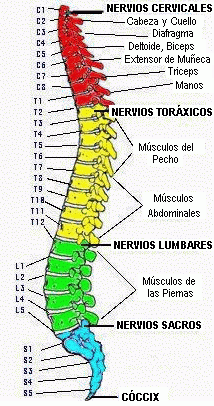

In [53]:
from IPython.display import Image
Image(filename=r'C:\Users\riul0\Desktop\columna.png') 

In [54]:
Labels_sorted['NIVEL LESION'].value_counts()

C5       6
C4       5
C7       5
C6       5
C8       4
C3-D4    3
D12      2
D11      2
D7       1
D3-D4    1
Name: NIVEL LESION, dtype: int64

In [71]:
C_4 = ['C4'] # 0
C_5 = ['C5'] # 1
C_6 = ['C6'] # 2
C_7 = ['C7'] # 3
C_8 = ['C8'] # 4

proximal_dorsal_muscles = ['C3-D4','D3-D4'] # Group 5
distal_dorsal_muscles = ['D7','D11', 'D12'] # Group 6


distal_upper_limb = ['C6','C7','C8']
proximal_upper_limb = ['C4','C5']

Cervical_group = [proximal_upper_limb, distal_upper_limb]
Dorsal_group = [proximal_dorsal_muscles, distal_dorsal_muscles]

In [74]:
Labels_sorted['NIVEL LESION V2'] = np.nan # Creation/Reset
Labels_sorted[['ASIA', 'NIVEL LESION', 'NIVEL LESION V2']].head(2)

,ASIA,NIVEL LESION,NIVEL LESION V2
ID,,,
L002M1NAAA,D,C7,NaN
L002M2NAAA,D,C7,NaN


In [80]:
Labels_sorted['NIVEL LESION V2.2'] = np.nan # Creation/Reset
Labels_sorted[['ASIA', 'NIVEL LESION', 'NIVEL LESION V2', 'NIVEL LESION V2.2']].head(2)

,ASIA,NIVEL LESION,NIVEL LESION V2,NIVEL LESION V2.2
ID,,,,
L002M1NAAA,D,C7,2,NaN
L002M2NAAA,D,C7,2,NaN


In [81]:
Labels_sorted['NIVEL LESION BIG CLASS'] = np.nan # Creation/Reset
Labels_sorted[['ASIA', 'NIVEL LESION', 'NIVEL LESION V2', 'NIVEL LESION V2.2','NIVEL LESION BIG CLASS']].head(2)

,ASIA,NIVEL LESION,NIVEL LESION V2,NIVEL LESION V2.2,NIVEL LESION BIG CLASS
ID,,,,,
L002M1NAAA,D,C7,2,NaN,NaN
L002M2NAAA,D,C7,2,NaN,NaN


In [84]:
ejemplo = 'C4'
if ejemplo in Cervical_group:
    print('hey')

In [93]:
# Small groups

for i in range(0,len(list(Labels_sorted.index))):
    if (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in C_4) :
        Labels_sorted['NIVEL LESION V2'].loc[[list(Labels_sorted.index)[i]]] = 0
    if (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in C_5) :
        Labels_sorted['NIVEL LESION V2'].loc[[list(Labels_sorted.index)[i]]] = 1
    if (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in C_6) :
        Labels_sorted['NIVEL LESION V2'].loc[[list(Labels_sorted.index)[i]]] = 2
    if (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in C_7) :
        Labels_sorted['NIVEL LESION V2'].loc[[list(Labels_sorted.index)[i]]] = 3
    if (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in C_8) :
        Labels_sorted['NIVEL LESION V2'].loc[[list(Labels_sorted.index)[i]]] = 4
    if (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in proximal_dorsal_muscles) :
        Labels_sorted['NIVEL LESION V2'].loc[[list(Labels_sorted.index)[i]]] = 5
    if (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in distal_dorsal_muscles) :
        Labels_sorted['NIVEL LESION V2'].loc[[list(Labels_sorted.index)[i]]] = 6
    
    
# Cervical big groups
    
for i in range(0,len(list(Labels_sorted.index))):
    if (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in proximal_upper_limb) :
        Labels_sorted['NIVEL LESION V2.2'].loc[[list(Labels_sorted.index)[i]]] = 0
    if (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in distal_upper_limb) :
        Labels_sorted['NIVEL LESION V2.2'].loc[[list(Labels_sorted.index)[i]]] = 1
        
# Dorsal big groups

for i in range(0,len(list(Labels_sorted.index))):
    if (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in proximal_dorsal_muscles) :
        Labels_sorted['NIVEL LESION V2.2'].loc[[list(Labels_sorted.index)[i]]] = 2
    if (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in distal_dorsal_muscles) :
        Labels_sorted['NIVEL LESION V2.2'].loc[[list(Labels_sorted.index)[i]]] = 3
        
# Big groups

for i in range(0,len(list(Labels_sorted.index))):
    if (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in proximal_upper_limb) or (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in distal_upper_limb):
        Labels_sorted['NIVEL LESION BIG CLASS'].loc[[list(Labels_sorted.index)[i]]] = 0
    if (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in proximal_dorsal_muscles) or (Labels_sorted['NIVEL LESION'].loc[list(Labels_sorted.index)[i]] in distal_dorsal_muscles):
        Labels_sorted['NIVEL LESION BIG CLASS'].loc[[list(Labels_sorted.index)[i]]] = 1

C:\Users\riul0\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [94]:
Labels_sorted['NIVEL LESION V2'] = Labels_sorted['NIVEL LESION V2'].astype(int)
Labels_sorted['NIVEL LESION V2.2'] = Labels_sorted['NIVEL LESION V2.2'].astype(int)
Labels_sorted['NIVEL LESION BIG CLASS'] = Labels_sorted['NIVEL LESION BIG CLASS'].astype(int)

In [95]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(Labels_sorted[['ASIA', 'NIVEL LESION', 'NIVEL LESION V2']].shape)
Labels_sorted[['ASIA', 'NIVEL LESION', 'NIVEL LESION V2', 'NIVEL LESION V2', 'NIVEL LESION BIG CLASS']].head(-1)

(34, 3)


,ASIA,NIVEL LESION,NIVEL LESION V2,NIVEL LESION V2,NIVEL LESION BIG CLASS
ID,,,,,
L002M1NAAA,D,C7,3,3,0
L002M2NAAA,D,C7,3,3,0
L022M1NAAA,D,C6,2,2,0
L031M1NAAA,D,C5,1,1,0
L031M3NAAA,D,C7,3,3,0
L043M2NAAA,BC,C6,2,2,0
L043M3NAAA,D,C6,2,2,0
L050M1NAAA,D,C6,2,2,0
L052M2NAAA,D,C4,0,0,0


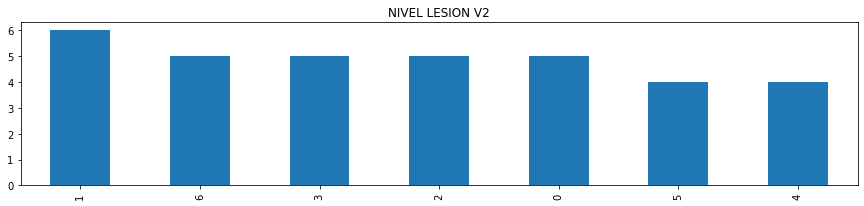

In [96]:
f, ax = plt.subplots(figsize=(15,3))
Hist = Labels_sorted['NIVEL LESION V2'].value_counts().plot.bar(title="NIVEL LESION V2")

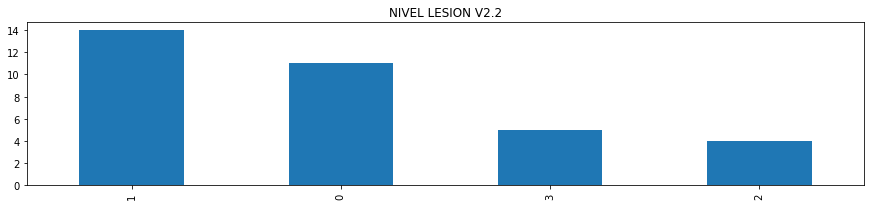

In [100]:
f, ax = plt.subplots(figsize=(15,3))
Hist = Labels_sorted['NIVEL LESION V2.2'].value_counts().plot.bar(title="NIVEL LESION V2.2")

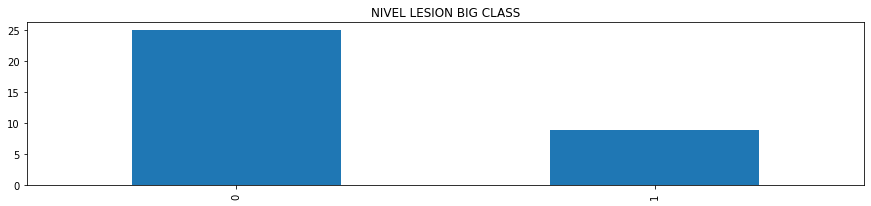

In [101]:
f, ax = plt.subplots(figsize=(15,3))
Hist = Labels_sorted['NIVEL LESION BIG CLASS'].value_counts().plot.bar(title="NIVEL LESION BIG CLASS")

In [103]:
number_repetitions_per_class = Labels_sorted.pivot_table(index=['NIVEL LESION V2'], aggfunc='size')
print(number_repetitions_per_class)

number_repetitions_per_class = Labels_sorted.pivot_table(index=['NIVEL LESION V2.2'], aggfunc='size')
print(number_repetitions_per_class)

number_repetitions_per_class = Labels_sorted.pivot_table(index=["NIVEL LESION BIG CLASS"], aggfunc='size')
print(number_repetitions_per_class)

NIVEL LESION V2
0    5
1    6
2    5
3    5
4    4
5    4
6    5
dtype: int64
NIVEL LESION V2.2
0    11
1    14
2     4
3     5
dtype: int64
NIVEL LESION BIG CLASS
0    25
1     9
dtype: int64


<br>

---

# Saving files as csv

In [ ]:
#data.to_csv(r'C:\Users\riul0\Desktop\TFG_Empresa\Patients_first_algorithm.csv')
#data = pd.read_csv(r'C:\Users\riul0\Desktop\TFG_Empresa\Patients_first_algorithm.csv')

In [104]:
#Labels_sorted.to_csv(r'C:\Users\riul0\Desktop\TFG_Empresa\Labels_first_algorithm.csv')
#Labels_sorted = pd.read_csv(r'C:\Users\riul0\Desktop\TFG_Empresa\Labels_first_algorithm.csv')

---

# Classifier

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
import os
import statistics 
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

In [2]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

C_4 = ['C4'] # 0
C_5 = ['C5'] # 1
C_6 = ['C6'] # 2
C_7 = ['C7'] # 3
C_8 = ['C8'] # 4


proximal_dorsal_muscles = ['C3-D4','D3-D4'] # Group 5
distal_dorsal_muscles = ['D7','D11', 'D12'] # Group 6


distal_upper_limb = [C_6,C_7,C_8]
proximal_upper_limb = [C_4,C_5]

Cervical_group = [proximal_upper_limb, distal_upper_limb]
Dorsal_group = [proximal_dorsal_muscles, distal_dorsal_muscles]

Whole_group = [Cervical_group, Dorsal_group]

for Big_group in Whole_group:
    print(namestr(Big_group, globals())[0], ' <<<<<<<<<<<<<<<<<<< ',"\n")
    for Group in Big_group:
        print(namestr(Group, globals())[0],'<--------',"\n")
        for i in Group:
            print(i, '\n')
print('\n')

Cervical_group  <<<<<<<<<<<<<<<<<<<  

proximal_upper_limb <-------- 

['C4'] 

['C5'] 

distal_upper_limb <-------- 

['C6'] 

['C7'] 

['C8'] 

Dorsal_group  <<<<<<<<<<<<<<<<<<<  

proximal_dorsal_muscles <-------- 

C3-D4 

D3-D4 

distal_dorsal_muscles <-------- 

D7 

D11 

D12 





In [3]:
data = pd.read_csv(r'C:\Users\riul0\Desktop\TFG_Empresa\Patients_first_algorithm.csv', sep=',')
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
data = data.set_index('Patients')
print(data.shape)
data.head(6)

(68, 100)


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,A7,TA2,TA3,TA5,TA6,A8,A9,A10,TA8,TA9
Patients,,,,,,,,,,,,,,,,,,,,,
M_DR_L002M1NAAA,62.939427,37.060573,0.808100,46.982558,1.290000,46.565346,0.628290,36.528477,0.387120,22.506977,...,12.835333,48.494895,43.696704,83.989903,78.162672,13.941667,4.429000,9.512667,63.959892,9.353930
M_IZ_L002M1NAAA,67.182370,32.817630,0.865200,50.302326,1.280000,46.904616,0.675437,39.269578,0.456413,26.535659,...,21.860667,49.655097,46.033977,90.285420,70.249037,13.016333,5.810333,7.206000,70.498242,43.120670
M_DR_L002M2NAAA,57.795502,42.204498,1.170233,68.036822,1.158333,51.884896,1.011775,58.824138,0.545543,31.717636,...,14.460000,38.444989,39.289854,86.348504,58.529717,-10.233667,-23.182333,12.948667,68.541686,27.807999
M_IZ_L002M2NAAA,62.615632,37.384368,1.116753,64.927519,1.185000,50.658932,0.942554,54.799654,0.585027,34.013178,...,21.800667,43.938594,42.996056,87.371152,63.596024,-4.325000,-20.855000,16.530000,65.081184,35.275158
M_DR_L022M1NAAA,66.656806,33.343194,0.793240,45.328000,1.258333,47.719076,0.629609,35.977656,0.365830,20.904571,...,18.210333,52.488308,6.187594,88.092239,88.358991,-10.264667,-25.095000,14.830333,35.409059,38.451961
M_IZ_L022M1NAAA,66.183206,33.816794,0.824777,47.130095,1.290000,46.534351,0.640877,36.621527,0.406320,23.218286,...,17.600000,46.666667,44.675827,86.784733,67.110433,-8.433333,-20.822000,12.388667,77.670229,35.250891


In [4]:
field_names_list = data.columns.values
field_names_list = field_names_list

Patient_data_aux = data.values
Patient_data = []
for idx in range(0,len(Patient_data_aux)):
    Patient_data.append(Patient_data_aux[idx,0:])
Patient_data = np.array(Patient_data)

field_names_R = list('R_' + field_names_list)
field_names_L = list('L_' + field_names_list)
field_names_all = field_names_R + field_names_L

Patient_data_all = Patient_data.reshape(int(Patient_data.shape[0]/2), int(2*Patient_data.shape[1]))

n_samples, n_features = Patient_data_all.shape

print('Loaded dataset including',str(n_samples),'samples with',str(n_features),'features')

Loaded dataset including 34 samples with 200 features


In [5]:
Labels_sorted = pd.read_csv(r'C:\Users\riul0\Desktop\TFG_Empresa\Labels_first_algorithm.csv', sep=',')
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
print(Labels_sorted[['ASIA', 'NIVEL LESION', 'NIVEL LESION V2', 'NIVEL LESION V2.2',"NIVEL LESION BIG CLASS"]].shape)
Labels_sorted[['ASIA', 'NIVEL LESION', 'NIVEL LESION V2', 'NIVEL LESION V2.2',"NIVEL LESION BIG CLASS"]].head(10)

(34, 5)


,ASIA,NIVEL LESION,NIVEL LESION V2,NIVEL LESION V2.2,NIVEL LESION BIG CLASS
0,D,C7,3,1,0
1,D,C7,3,1,0
2,D,C6,2,1,0
3,D,C5,1,0,0
4,D,C7,3,1,0
5,BC,C6,2,1,0
6,D,C6,2,1,0
7,D,C6,2,1,0
8,D,C4,0,0,0
9,E,D7,6,3,1


In [6]:
number_asia = Labels_sorted.pivot_table(index=['ASIA'], aggfunc='size')
print(number_asia)

ASIA
BC     1
C      1
D     29
E      3
dtype: int64


In [7]:
import scipy
from scipy import interp
# activate latex text rendering ??
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFwe, SelectPercentile, f_classif
from sklearn.kernel_approximation import Nystroem
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc, classification_report, recall_score

In [8]:
#pip install shap

In [9]:
#pip install TPOT

In [10]:
import shap
from itertools import compress
from tpot.builtins import StackingEstimator

<br>

<br>

In [11]:
# #############################################################################
# Classification and ROC analysis

# Split the dataset into training and test sets using a K fold approach

n_splits = 4
n_repeats = 1000

cv = RepeatedStratifiedKFold(n_splits,n_repeats,random_state=36851234)


classifier = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.05, 
                                  min_samples_leaf=4, min_samples_split=12, n_estimators=100)

#classifier = make_pipeline (
    #SelectPercentile(score_func=f_classif, percentile=4),
    #StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.001, max_depth=3, max_features=0.9000000000000001, min_samples_leaf=12, min_samples_split=10, n_estimators=100, subsample=0.7500000000000001)),
    #SelectFwe(score_func=f_classif, alpha=0.011),
    #StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.7500000000000001, min_samples_leaf=9, min_samples_split=13, n_estimators=100)),
    #Nystroem(gamma=0.4, kernel="additive_chi2", n_components=n_features),
    #Nystroem(gamma=0.2, kernel="linear", n_components=n_features),
    #ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.05, min_samples_leaf=4, min_samples_split=12, n_estimators=100
#                        ))

Pass n_splits=4, n_repeats=1000 as keyword args. From version 0.25 passing these as positional arguments will result in an error


In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize

from sklearn.metrics import confusion_matrix

scaler = MinMaxScaler()
#n_classes = len(Labels_sorted['NIVEL LESION V2'].unique())

In [13]:
X = Patient_data_all
X = scaler.fit_transform(X)
Y = Labels_sorted['NIVEL LESION BIG CLASS'].values

In [14]:
print(Y.shape, X.shape)

(34,) (34, 200)


0    25
1     9
Name: NIVEL LESION BIG CLASS, dtype: int64


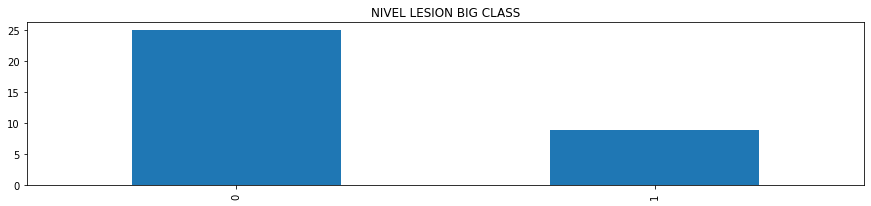

In [15]:
f, ax = plt.subplots(figsize=(15,3))
print(Labels_sorted['NIVEL LESION BIG CLASS'].value_counts())
Hist = Labels_sorted['NIVEL LESION BIG CLASS'].value_counts().plot.bar(title="NIVEL LESION BIG CLASS")

In [16]:
print(Y.shape, X.shape)

(34,) (34, 200)


In [68]:
# Model Evaluation

performance_list = []
sensitivity_list = []
specificity_list = []

tprs = []   # True prediction errors
aucs = []   # Area unde_listr the curve
Ys = []
Zs = []

feat_importances = []

median_fpr = np.linspace(0, 1, 1000)


zzz = 0

for train, test in cv.split(X, Y): 
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]
    
    Ys.extend(Y_test) 

    classifier.fit(X_train, Y_train)

    Z = classifier.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, Z[:, 1])   # Falpse positive and true positive rate
    roc_auc = auc(fpr, tpr) 
    
    
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_train)
    
    # SHapley Additive exPlanations
    # SHAP : impact of variables taking into account the interaction with other variables.
    
    Y_pred = classifier.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred, labels=[0,1]).ravel()

    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    
    
    performance_list.append(classifier.score(X_test,Y_test))
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    tprs.append(np.interp(median_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)
    Zs.extend(Z[:, 1])
    
    feat_importances.append(np.median(np.abs(shap_values[1]),axis=0))
    
    print('Results for iteration ',str(zzz),' computed.')
    zzz += 1
    
print('\n')
print('Final metrics')
print('\n')
print('Accuracy', np.mean(performance_list), ', STD : ', np.std(performance_list))
print('Sensitivity', np.mean(sensitivity_list), ', STD : ', np.std(sensitivity_list))
print('Specifity', np.mean(specificity_list), ', STD : ', np.std(specificity_list))

Results for iteration  0  computed.
Results for iteration  1  computed.
Results for iteration  2  computed.
Results for iteration  3  computed.
Results for iteration  4  computed.
Results for iteration  5  computed.
Results for iteration  6  computed.
Results for iteration  7  computed.
Results for iteration  8  computed.
Results for iteration  9  computed.
Results for iteration  10  computed.
Results for iteration  11  computed.
Results for iteration  12  computed.
Results for iteration  13  computed.
Results for iteration  14  computed.
Results for iteration  15  computed.
Results for iteration  16  computed.
Results for iteration  17  computed.
Results for iteration  18  computed.
Results for iteration  19  computed.
Results for iteration  20  computed.
Results for iteration  21  computed.
Results for iteration  22  computed.
Results for iteration  23  computed.
Results for iteration  24  computed.
Results for iteration  25  computed.
Results for iteration  26  computed.
Results for

Results for iteration  219  computed.
Results for iteration  220  computed.
Results for iteration  221  computed.
Results for iteration  222  computed.
Results for iteration  223  computed.
Results for iteration  224  computed.
Results for iteration  225  computed.
Results for iteration  226  computed.
Results for iteration  227  computed.
Results for iteration  228  computed.
Results for iteration  229  computed.
Results for iteration  230  computed.
Results for iteration  231  computed.
Results for iteration  232  computed.
Results for iteration  233  computed.
Results for iteration  234  computed.
Results for iteration  235  computed.
Results for iteration  236  computed.
Results for iteration  237  computed.
Results for iteration  238  computed.
Results for iteration  239  computed.
Results for iteration  240  computed.
Results for iteration  241  computed.
Results for iteration  242  computed.
Results for iteration  243  computed.
Results for iteration  244  computed.
Results for 

Results for iteration  435  computed.
Results for iteration  436  computed.
Results for iteration  437  computed.
Results for iteration  438  computed.
Results for iteration  439  computed.
Results for iteration  440  computed.
Results for iteration  441  computed.
Results for iteration  442  computed.
Results for iteration  443  computed.
Results for iteration  444  computed.
Results for iteration  445  computed.
Results for iteration  446  computed.
Results for iteration  447  computed.
Results for iteration  448  computed.
Results for iteration  449  computed.
Results for iteration  450  computed.
Results for iteration  451  computed.
Results for iteration  452  computed.
Results for iteration  453  computed.
Results for iteration  454  computed.
Results for iteration  455  computed.
Results for iteration  456  computed.
Results for iteration  457  computed.
Results for iteration  458  computed.
Results for iteration  459  computed.
Results for iteration  460  computed.
Results for 

Results for iteration  652  computed.
Results for iteration  653  computed.
Results for iteration  654  computed.
Results for iteration  655  computed.
Results for iteration  656  computed.
Results for iteration  657  computed.
Results for iteration  658  computed.
Results for iteration  659  computed.
Results for iteration  660  computed.
Results for iteration  661  computed.
Results for iteration  662  computed.
Results for iteration  663  computed.
Results for iteration  664  computed.
Results for iteration  665  computed.
Results for iteration  666  computed.
Results for iteration  667  computed.
Results for iteration  668  computed.
Results for iteration  669  computed.
Results for iteration  670  computed.
Results for iteration  671  computed.
Results for iteration  672  computed.
Results for iteration  673  computed.
Results for iteration  674  computed.
Results for iteration  675  computed.
Results for iteration  676  computed.
Results for iteration  677  computed.
Results for 

Results for iteration  868  computed.
Results for iteration  869  computed.
Results for iteration  870  computed.
Results for iteration  871  computed.
Results for iteration  872  computed.
Results for iteration  873  computed.
Results for iteration  874  computed.
Results for iteration  875  computed.
Results for iteration  876  computed.
Results for iteration  877  computed.
Results for iteration  878  computed.
Results for iteration  879  computed.
Results for iteration  880  computed.
Results for iteration  881  computed.
Results for iteration  882  computed.
Results for iteration  883  computed.
Results for iteration  884  computed.
Results for iteration  885  computed.
Results for iteration  886  computed.
Results for iteration  887  computed.
Results for iteration  888  computed.
Results for iteration  889  computed.
Results for iteration  890  computed.
Results for iteration  891  computed.
Results for iteration  892  computed.
Results for iteration  893  computed.
Results for 

Results for iteration  1082  computed.
Results for iteration  1083  computed.
Results for iteration  1084  computed.
Results for iteration  1085  computed.
Results for iteration  1086  computed.
Results for iteration  1087  computed.
Results for iteration  1088  computed.
Results for iteration  1089  computed.
Results for iteration  1090  computed.
Results for iteration  1091  computed.
Results for iteration  1092  computed.
Results for iteration  1093  computed.
Results for iteration  1094  computed.
Results for iteration  1095  computed.
Results for iteration  1096  computed.
Results for iteration  1097  computed.
Results for iteration  1098  computed.
Results for iteration  1099  computed.
Results for iteration  1100  computed.
Results for iteration  1101  computed.
Results for iteration  1102  computed.
Results for iteration  1103  computed.
Results for iteration  1104  computed.
Results for iteration  1105  computed.
Results for iteration  1106  computed.
Results for iteration  11

Results for iteration  1294  computed.
Results for iteration  1295  computed.
Results for iteration  1296  computed.
Results for iteration  1297  computed.
Results for iteration  1298  computed.
Results for iteration  1299  computed.
Results for iteration  1300  computed.
Results for iteration  1301  computed.
Results for iteration  1302  computed.
Results for iteration  1303  computed.
Results for iteration  1304  computed.
Results for iteration  1305  computed.
Results for iteration  1306  computed.
Results for iteration  1307  computed.
Results for iteration  1308  computed.
Results for iteration  1309  computed.
Results for iteration  1310  computed.
Results for iteration  1311  computed.
Results for iteration  1312  computed.
Results for iteration  1313  computed.
Results for iteration  1314  computed.
Results for iteration  1315  computed.
Results for iteration  1316  computed.
Results for iteration  1317  computed.
Results for iteration  1318  computed.
Results for iteration  13

Results for iteration  1505  computed.
Results for iteration  1506  computed.
Results for iteration  1507  computed.
Results for iteration  1508  computed.
Results for iteration  1509  computed.
Results for iteration  1510  computed.
Results for iteration  1511  computed.
Results for iteration  1512  computed.
Results for iteration  1513  computed.
Results for iteration  1514  computed.
Results for iteration  1515  computed.
Results for iteration  1516  computed.
Results for iteration  1517  computed.
Results for iteration  1518  computed.
Results for iteration  1519  computed.
Results for iteration  1520  computed.
Results for iteration  1521  computed.
Results for iteration  1522  computed.
Results for iteration  1523  computed.
Results for iteration  1524  computed.
Results for iteration  1525  computed.
Results for iteration  1526  computed.
Results for iteration  1527  computed.
Results for iteration  1528  computed.
Results for iteration  1529  computed.
Results for iteration  15

Results for iteration  1716  computed.
Results for iteration  1717  computed.
Results for iteration  1718  computed.
Results for iteration  1719  computed.
Results for iteration  1720  computed.
Results for iteration  1721  computed.
Results for iteration  1722  computed.
Results for iteration  1723  computed.
Results for iteration  1724  computed.
Results for iteration  1725  computed.
Results for iteration  1726  computed.
Results for iteration  1727  computed.
Results for iteration  1728  computed.
Results for iteration  1729  computed.
Results for iteration  1730  computed.
Results for iteration  1731  computed.
Results for iteration  1732  computed.
Results for iteration  1733  computed.
Results for iteration  1734  computed.
Results for iteration  1735  computed.
Results for iteration  1736  computed.
Results for iteration  1737  computed.
Results for iteration  1738  computed.
Results for iteration  1739  computed.
Results for iteration  1740  computed.
Results for iteration  17

Results for iteration  1927  computed.
Results for iteration  1928  computed.
Results for iteration  1929  computed.
Results for iteration  1930  computed.
Results for iteration  1931  computed.
Results for iteration  1932  computed.
Results for iteration  1933  computed.
Results for iteration  1934  computed.
Results for iteration  1935  computed.
Results for iteration  1936  computed.
Results for iteration  1937  computed.
Results for iteration  1938  computed.
Results for iteration  1939  computed.
Results for iteration  1940  computed.
Results for iteration  1941  computed.
Results for iteration  1942  computed.
Results for iteration  1943  computed.
Results for iteration  1944  computed.
Results for iteration  1945  computed.
Results for iteration  1946  computed.
Results for iteration  1947  computed.
Results for iteration  1948  computed.
Results for iteration  1949  computed.
Results for iteration  1950  computed.
Results for iteration  1951  computed.
Results for iteration  19

Results for iteration  2138  computed.
Results for iteration  2139  computed.
Results for iteration  2140  computed.
Results for iteration  2141  computed.
Results for iteration  2142  computed.
Results for iteration  2143  computed.
Results for iteration  2144  computed.
Results for iteration  2145  computed.
Results for iteration  2146  computed.
Results for iteration  2147  computed.
Results for iteration  2148  computed.
Results for iteration  2149  computed.
Results for iteration  2150  computed.
Results for iteration  2151  computed.
Results for iteration  2152  computed.
Results for iteration  2153  computed.
Results for iteration  2154  computed.
Results for iteration  2155  computed.
Results for iteration  2156  computed.
Results for iteration  2157  computed.
Results for iteration  2158  computed.
Results for iteration  2159  computed.
Results for iteration  2160  computed.
Results for iteration  2161  computed.
Results for iteration  2162  computed.
Results for iteration  21

Results for iteration  2349  computed.
Results for iteration  2350  computed.
Results for iteration  2351  computed.
Results for iteration  2352  computed.
Results for iteration  2353  computed.
Results for iteration  2354  computed.
Results for iteration  2355  computed.
Results for iteration  2356  computed.
Results for iteration  2357  computed.
Results for iteration  2358  computed.
Results for iteration  2359  computed.
Results for iteration  2360  computed.
Results for iteration  2361  computed.
Results for iteration  2362  computed.
Results for iteration  2363  computed.
Results for iteration  2364  computed.
Results for iteration  2365  computed.
Results for iteration  2366  computed.
Results for iteration  2367  computed.
Results for iteration  2368  computed.
Results for iteration  2369  computed.
Results for iteration  2370  computed.
Results for iteration  2371  computed.
Results for iteration  2372  computed.
Results for iteration  2373  computed.
Results for iteration  23

Results for iteration  2560  computed.
Results for iteration  2561  computed.
Results for iteration  2562  computed.
Results for iteration  2563  computed.
Results for iteration  2564  computed.
Results for iteration  2565  computed.
Results for iteration  2566  computed.
Results for iteration  2567  computed.
Results for iteration  2568  computed.
Results for iteration  2569  computed.
Results for iteration  2570  computed.
Results for iteration  2571  computed.
Results for iteration  2572  computed.
Results for iteration  2573  computed.
Results for iteration  2574  computed.
Results for iteration  2575  computed.
Results for iteration  2576  computed.
Results for iteration  2577  computed.
Results for iteration  2578  computed.
Results for iteration  2579  computed.
Results for iteration  2580  computed.
Results for iteration  2581  computed.
Results for iteration  2582  computed.
Results for iteration  2583  computed.
Results for iteration  2584  computed.
Results for iteration  25

Results for iteration  2771  computed.
Results for iteration  2772  computed.
Results for iteration  2773  computed.
Results for iteration  2774  computed.
Results for iteration  2775  computed.
Results for iteration  2776  computed.
Results for iteration  2777  computed.
Results for iteration  2778  computed.
Results for iteration  2779  computed.
Results for iteration  2780  computed.
Results for iteration  2781  computed.
Results for iteration  2782  computed.
Results for iteration  2783  computed.
Results for iteration  2784  computed.
Results for iteration  2785  computed.
Results for iteration  2786  computed.
Results for iteration  2787  computed.
Results for iteration  2788  computed.
Results for iteration  2789  computed.
Results for iteration  2790  computed.
Results for iteration  2791  computed.
Results for iteration  2792  computed.
Results for iteration  2793  computed.
Results for iteration  2794  computed.
Results for iteration  2795  computed.
Results for iteration  27

Results for iteration  2983  computed.
Results for iteration  2984  computed.
Results for iteration  2985  computed.
Results for iteration  2986  computed.
Results for iteration  2987  computed.
Results for iteration  2988  computed.
Results for iteration  2989  computed.
Results for iteration  2990  computed.
Results for iteration  2991  computed.
Results for iteration  2992  computed.
Results for iteration  2993  computed.
Results for iteration  2994  computed.
Results for iteration  2995  computed.
Results for iteration  2996  computed.
Results for iteration  2997  computed.
Results for iteration  2998  computed.
Results for iteration  2999  computed.
Results for iteration  3000  computed.
Results for iteration  3001  computed.
Results for iteration  3002  computed.
Results for iteration  3003  computed.
Results for iteration  3004  computed.
Results for iteration  3005  computed.
Results for iteration  3006  computed.
Results for iteration  3007  computed.
Results for iteration  30

Results for iteration  3194  computed.
Results for iteration  3195  computed.
Results for iteration  3196  computed.
Results for iteration  3197  computed.
Results for iteration  3198  computed.
Results for iteration  3199  computed.
Results for iteration  3200  computed.
Results for iteration  3201  computed.
Results for iteration  3202  computed.
Results for iteration  3203  computed.
Results for iteration  3204  computed.
Results for iteration  3205  computed.
Results for iteration  3206  computed.
Results for iteration  3207  computed.
Results for iteration  3208  computed.
Results for iteration  3209  computed.
Results for iteration  3210  computed.
Results for iteration  3211  computed.
Results for iteration  3212  computed.
Results for iteration  3213  computed.
Results for iteration  3214  computed.
Results for iteration  3215  computed.
Results for iteration  3216  computed.
Results for iteration  3217  computed.
Results for iteration  3218  computed.
Results for iteration  32

Results for iteration  3406  computed.
Results for iteration  3407  computed.
Results for iteration  3408  computed.
Results for iteration  3409  computed.
Results for iteration  3410  computed.
Results for iteration  3411  computed.
Results for iteration  3412  computed.
Results for iteration  3413  computed.
Results for iteration  3414  computed.
Results for iteration  3415  computed.
Results for iteration  3416  computed.
Results for iteration  3417  computed.
Results for iteration  3418  computed.
Results for iteration  3419  computed.
Results for iteration  3420  computed.
Results for iteration  3421  computed.
Results for iteration  3422  computed.
Results for iteration  3423  computed.
Results for iteration  3424  computed.
Results for iteration  3425  computed.
Results for iteration  3426  computed.
Results for iteration  3427  computed.
Results for iteration  3428  computed.
Results for iteration  3429  computed.
Results for iteration  3430  computed.
Results for iteration  34

Results for iteration  3617  computed.
Results for iteration  3618  computed.
Results for iteration  3619  computed.
Results for iteration  3620  computed.
Results for iteration  3621  computed.
Results for iteration  3622  computed.
Results for iteration  3623  computed.
Results for iteration  3624  computed.
Results for iteration  3625  computed.
Results for iteration  3626  computed.
Results for iteration  3627  computed.
Results for iteration  3628  computed.
Results for iteration  3629  computed.
Results for iteration  3630  computed.
Results for iteration  3631  computed.
Results for iteration  3632  computed.
Results for iteration  3633  computed.
Results for iteration  3634  computed.
Results for iteration  3635  computed.
Results for iteration  3636  computed.
Results for iteration  3637  computed.
Results for iteration  3638  computed.
Results for iteration  3639  computed.
Results for iteration  3640  computed.
Results for iteration  3641  computed.
Results for iteration  36

Results for iteration  3829  computed.
Results for iteration  3830  computed.
Results for iteration  3831  computed.
Results for iteration  3832  computed.
Results for iteration  3833  computed.
Results for iteration  3834  computed.
Results for iteration  3835  computed.
Results for iteration  3836  computed.
Results for iteration  3837  computed.
Results for iteration  3838  computed.
Results for iteration  3839  computed.
Results for iteration  3840  computed.
Results for iteration  3841  computed.
Results for iteration  3842  computed.
Results for iteration  3843  computed.
Results for iteration  3844  computed.
Results for iteration  3845  computed.
Results for iteration  3846  computed.
Results for iteration  3847  computed.
Results for iteration  3848  computed.
Results for iteration  3849  computed.
Results for iteration  3850  computed.
Results for iteration  3851  computed.
Results for iteration  3852  computed.
Results for iteration  3853  computed.
Results for iteration  38

# No balanced

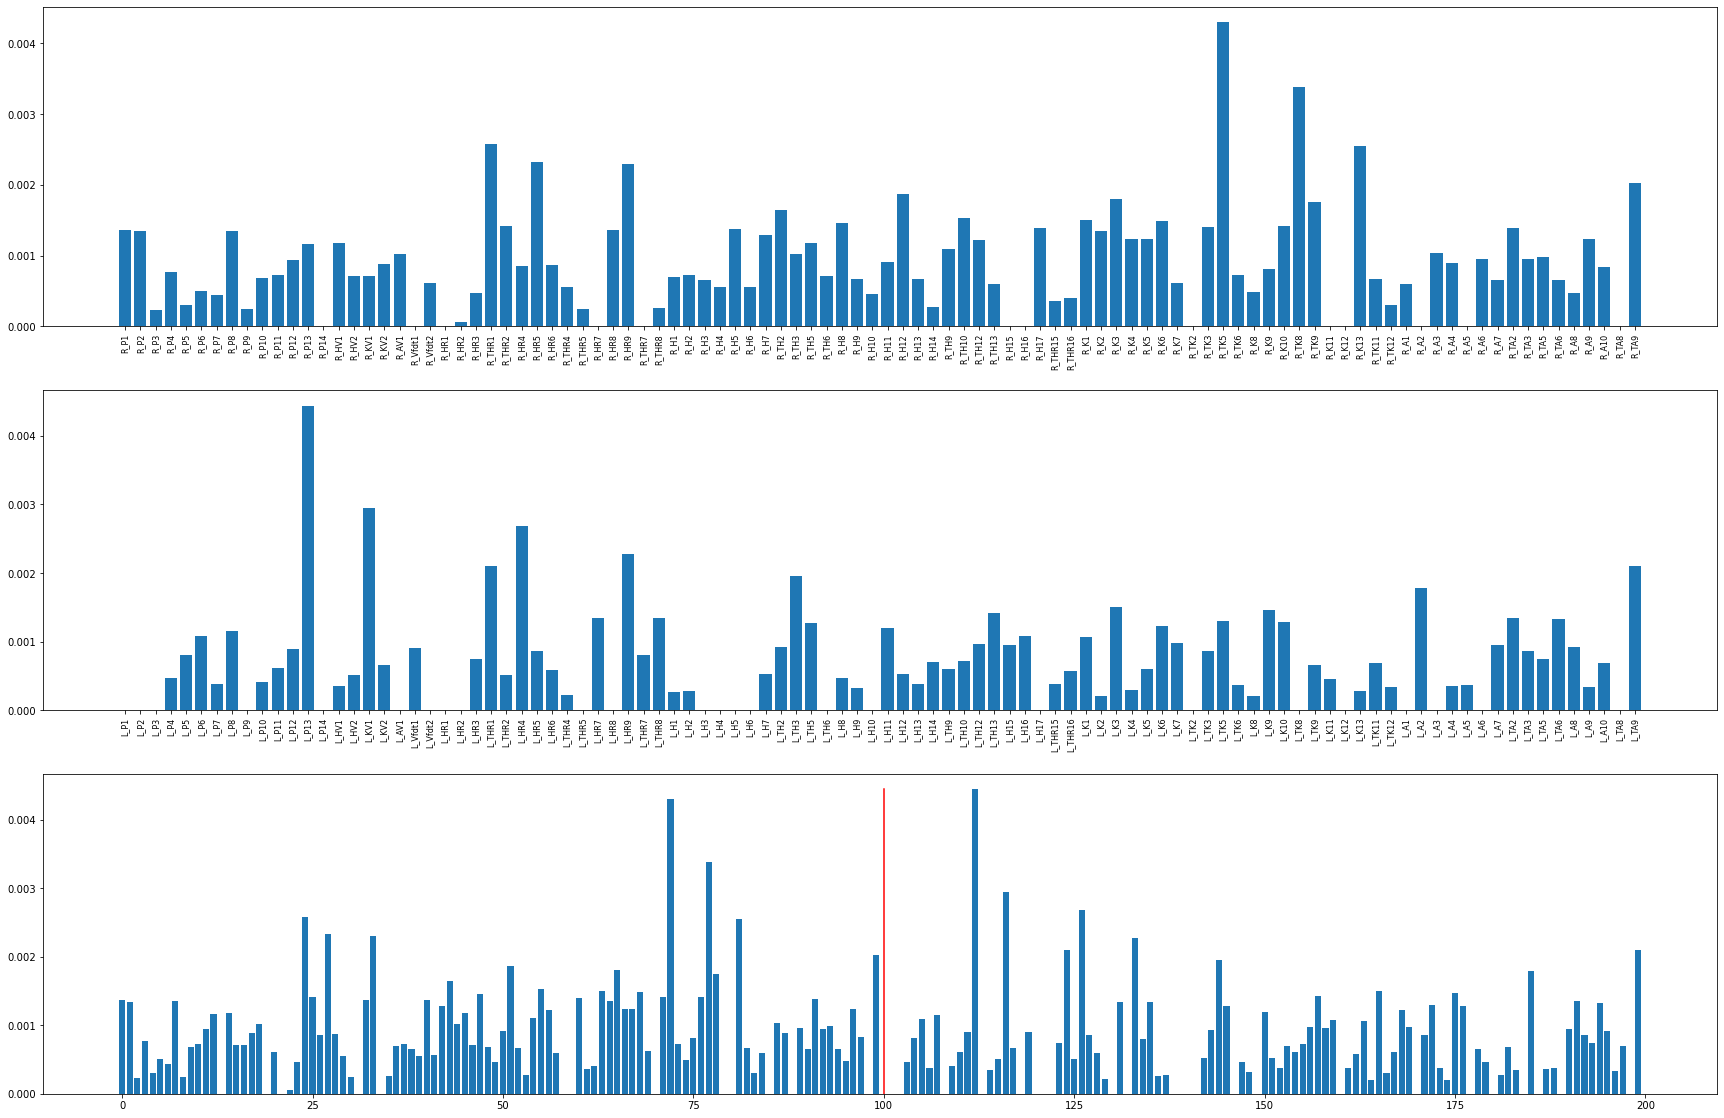

In [69]:
median_importances = np.median(feat_importances, axis=0)
MAD_importances = scipy.stats.median_abs_deviation(feat_importances, scale=1.0, axis=0)

plt.figure(figsize = (30,20))

plt.subplot(3,1,1)

mitad = int(len(median_importances)/2)
mitad_2 = int(len(field_names_all)/2)

plt.bar(range(0,mitad),median_importances[0:mitad])
plt.xticks(np.arange(0,mitad_2), field_names_all[0:mitad_2], 
           rotation= 90, fontsize = 8)

plt.subplot(3,1,2)

plt.bar(range(mitad,len(median_importances)),median_importances[mitad:])
plt.xticks(np.arange(mitad_2,len(field_names_all)), field_names_all[mitad_2:], 
           rotation= 90, fontsize = 8)


plt.subplot(3,1,3)

plt.bar(range(0,len(median_importances)),median_importances)
x_coordinates = [mitad, mitad]
y_coordinates = [0, max(median_importances)]
plt.plot(x_coordinates, y_coordinates, color = 'r')

plt.show()

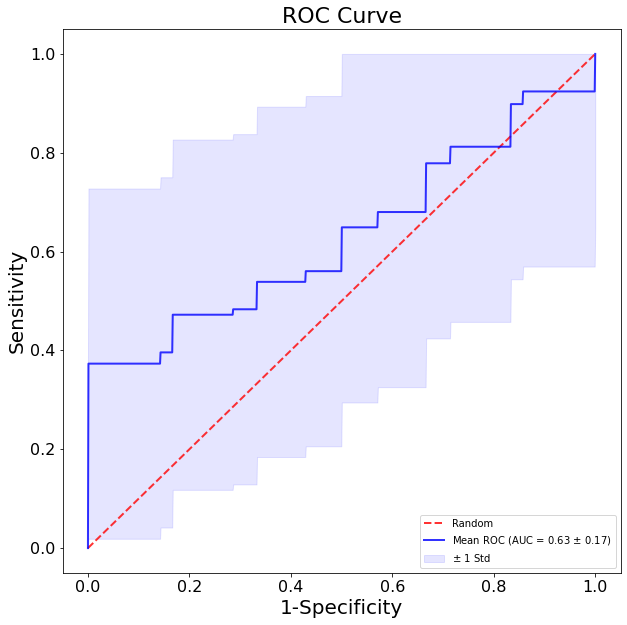

In [70]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111)

# Plot random ROC curve
Random_roc = ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

median_tpr = np.mean(tprs, axis=0)
median_tpr[-1] = 1.0
median_auc = auc(median_fpr, median_tpr)
MAD_auc = scipy.stats.median_abs_deviation(aucs, scale=1.0)
Median_roc = ax1.plot(median_fpr, median_tpr, color='b',
  label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (median_auc, MAD_auc),
  lw=2, alpha=.8)

MAD_tpr = np.std(tprs)
tprs_upper = np.minimum(median_tpr + MAD_tpr, 1)
tprs_lower = np.maximum(median_tpr - MAD_tpr, 0)
Median_tprs = ax1.fill_between(median_fpr, tprs_lower, tprs_upper, color='blue', alpha=.1,
  label=r'$\pm$ 1 Std')

# Display ROC curves
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
ax1.tick_params(labelsize=16)
plt.xlabel('1-Specificity', fontsize=20)
plt.ylabel('Sensitivity', fontsize=20)
plt.title('ROC Curve', fontsize=22)
plt.legend(loc="lower right")
plt.show()

---

# Balanced

In [71]:
n_splits = 4
n_repeats = 1000

cv = RepeatedStratifiedKFold(n_splits,n_repeats,random_state=36851234)

# Run classifier with cross-validation and plot boundaries and ROC curves

classifier = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.05, min_samples_leaf=4, min_samples_split=12, 
                                  n_estimators=100)

Pass n_splits=4, n_repeats=1000 as keyword args. From version 0.25 passing these as positional arguments will result in an error


In [72]:
import random
index_cervical = Labels_sorted.index[Labels_sorted['NIVEL LESION BIG CLASS'] == 0].tolist()
print(index_cervical)
random_list = random.sample(index_cervical, 10)
print(random_list)

index_dorsal = Labels_sorted.index[Labels_sorted['NIVEL LESION BIG CLASS'] == 1].tolist()
print(index_dorsal)

index_total_example = random_list + index_dorsal
print(index_total_example)

Labels_sorted_example = Labels_sorted.loc[index_total_example]
print(Labels_sorted.shape)
print(Labels_sorted_example.shape)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 21, 22, 23, 24, 25, 26, 28, 30, 32, 33]
[28, 7, 23, 25, 26, 8, 16, 2, 5, 30]
[9, 14, 17, 18, 19, 20, 27, 29, 31]
[28, 7, 23, 25, 26, 8, 16, 2, 5, 30, 9, 14, 17, 18, 19, 20, 27, 29, 31]
(34, 16)
(19, 16)


In [73]:
print(Labels_sorted_example['ID'].to_list())
labels_names_patient_example = Labels_sorted_example['ID'].to_list()

Patient_data_example = []


for i in labels_names_patient_example:
    one = 'M_DR_' + i 
    two = 'M_IZ_' + i 
    Patient_data_example.append(one)
    Patient_data_example.append(two)
    
print('\n',Patient_data_example[0:2])

data.head(2)

['L260M1NAAA', 'L050M1NAAA', 'L180M1NAAA', 'L206M1NAAA', 'L206M2NAAA', 'L052M2NAAA', 'L148M6NAAA', 'L022M1NAAA', 'L043M2NAAA', 'L285M1NAAA', 'L060M1NAAA', 'L139M1NAAA', 'L157M1NAAA', 'L157M2NAAA', 'L157M3NAAA', 'L157M4NAAA', 'L217M1NAAA', 'L271M1NAAA', 'L288M1NAAA']

 ['M_DR_L260M1NAAA', 'M_IZ_L260M1NAAA']


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,A7,TA2,TA3,TA5,TA6,A8,A9,A10,TA8,TA9
Patients,,,,,,,,,,,,,,,,,,,,,
M_DR_L002M1NAAA,62.939427,37.060573,0.8081,46.982558,1.29,46.565346,0.628290,36.528477,0.387120,22.506977,...,12.835333,48.494895,43.696704,83.989903,78.162672,13.941667,4.429000,9.512667,63.959892,9.35393
M_IZ_L002M1NAAA,67.182370,32.817630,0.8652,50.302326,1.28,46.904616,0.675437,39.269578,0.456413,26.535659,...,21.860667,49.655097,46.033977,90.285420,70.249037,13.016333,5.810333,7.206000,70.498242,43.12067


In [74]:
data_example = data.loc[Patient_data_example]
print(data_example.shape)

field_names_list = data_example.columns.values
field_names_list = field_names_list

Patient_data_aux = data_example.values
Patient_data = []
for idx in range(0,len(Patient_data_aux)):
    Patient_data.append(Patient_data_aux[idx,0:])
Patient_data = np.array(Patient_data)

field_names_R = list('R_' + field_names_list)
field_names_L = list('L_' + field_names_list)
field_names_all = field_names_R + field_names_L

Patient_data_all = Patient_data.reshape(int(Patient_data.shape[0]/2), int(2*Patient_data.shape[1]))

n_samples, n_features = Patient_data_all.shape

print('Loaded dataset including',str(n_samples),'samples with',str(n_features),'features')

(38, 100)
Loaded dataset including 19 samples with 200 features


In [75]:
X = Patient_data_all
X = scaler.fit_transform(X)
Y = Labels_sorted_example['NIVEL LESION BIG CLASS'].values

In [76]:
print(Y.shape, X.shape)

(19,) (19, 200)


In [77]:
# Model Evaluation

performance_list = []
sensitivity_list = []
specificity_list = []

tprs = []   # True prediction errors
aucs = []   # Area unde_listr the curve
Ys = []
Zs = []
feat_importances = []

median_fpr = np.linspace(0, 1, 1000)


zzz = 0

for train, test in cv.split(X, Y): 
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]
    
    Ys.extend(Y_test) 

    classifier.fit(X_train, Y_train)

    Z = classifier.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, Z[:, 1])   # Falpse positive and true positive rate
    roc_auc = auc(fpr, tpr) 
    
    
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_train)
    
    # SHapley Additive exPlanations
    # SHAP : impact of variables taking into account the interaction with other variables.
    
    Y_pred = classifier.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred, labels=[0,1]).ravel()

    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    
    
    performance_list.append(classifier.score(X_test,Y_test))
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    tprs.append(np.interp(median_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)
    Zs.extend(Z[:, 1])
    
    feat_importances.append(np.median(np.abs(shap_values[1]),axis=0))
    
    print('Results for iteration ',str(zzz),' computed.')
    zzz += 1
    
print('\n')
print('Final metrics')
print('\n')
print('Accuracy', np.mean(performance_list), ', STD : ', np.std(performance_list))
print('Sensitivity', np.mean(sensitivity_list), ', STD : ', np.std(sensitivity_list))
print('Specifity', np.mean(specificity_list), ', STD : ', np.std(specificity_list))

Results for iteration  0  computed.
Results for iteration  1  computed.
Results for iteration  2  computed.
Results for iteration  3  computed.
Results for iteration  4  computed.
Results for iteration  5  computed.
Results for iteration  6  computed.
Results for iteration  7  computed.
Results for iteration  8  computed.
Results for iteration  9  computed.
Results for iteration  10  computed.
Results for iteration  11  computed.
Results for iteration  12  computed.
Results for iteration  13  computed.
Results for iteration  14  computed.
Results for iteration  15  computed.
Results for iteration  16  computed.
Results for iteration  17  computed.
Results for iteration  18  computed.
Results for iteration  19  computed.
Results for iteration  20  computed.
Results for iteration  21  computed.
Results for iteration  22  computed.
Results for iteration  23  computed.
Results for iteration  24  computed.
Results for iteration  25  computed.
Results for iteration  26  computed.
Results for

Results for iteration  220  computed.
Results for iteration  221  computed.
Results for iteration  222  computed.
Results for iteration  223  computed.
Results for iteration  224  computed.
Results for iteration  225  computed.
Results for iteration  226  computed.
Results for iteration  227  computed.
Results for iteration  228  computed.
Results for iteration  229  computed.
Results for iteration  230  computed.
Results for iteration  231  computed.
Results for iteration  232  computed.
Results for iteration  233  computed.
Results for iteration  234  computed.
Results for iteration  235  computed.
Results for iteration  236  computed.
Results for iteration  237  computed.
Results for iteration  238  computed.
Results for iteration  239  computed.
Results for iteration  240  computed.
Results for iteration  241  computed.
Results for iteration  242  computed.
Results for iteration  243  computed.
Results for iteration  244  computed.
Results for iteration  245  computed.
Results for 

Results for iteration  437  computed.
Results for iteration  438  computed.
Results for iteration  439  computed.
Results for iteration  440  computed.
Results for iteration  441  computed.
Results for iteration  442  computed.
Results for iteration  443  computed.
Results for iteration  444  computed.
Results for iteration  445  computed.
Results for iteration  446  computed.
Results for iteration  447  computed.
Results for iteration  448  computed.
Results for iteration  449  computed.
Results for iteration  450  computed.
Results for iteration  451  computed.
Results for iteration  452  computed.
Results for iteration  453  computed.
Results for iteration  454  computed.
Results for iteration  455  computed.
Results for iteration  456  computed.
Results for iteration  457  computed.
Results for iteration  458  computed.
Results for iteration  459  computed.
Results for iteration  460  computed.
Results for iteration  461  computed.
Results for iteration  462  computed.
Results for 

Results for iteration  653  computed.
Results for iteration  654  computed.
Results for iteration  655  computed.
Results for iteration  656  computed.
Results for iteration  657  computed.
Results for iteration  658  computed.
Results for iteration  659  computed.
Results for iteration  660  computed.
Results for iteration  661  computed.
Results for iteration  662  computed.
Results for iteration  663  computed.
Results for iteration  664  computed.
Results for iteration  665  computed.
Results for iteration  666  computed.
Results for iteration  667  computed.
Results for iteration  668  computed.
Results for iteration  669  computed.
Results for iteration  670  computed.
Results for iteration  671  computed.
Results for iteration  672  computed.
Results for iteration  673  computed.
Results for iteration  674  computed.
Results for iteration  675  computed.
Results for iteration  676  computed.
Results for iteration  677  computed.
Results for iteration  678  computed.
Results for 

Results for iteration  869  computed.
Results for iteration  870  computed.
Results for iteration  871  computed.
Results for iteration  872  computed.
Results for iteration  873  computed.
Results for iteration  874  computed.
Results for iteration  875  computed.
Results for iteration  876  computed.
Results for iteration  877  computed.
Results for iteration  878  computed.
Results for iteration  879  computed.
Results for iteration  880  computed.
Results for iteration  881  computed.
Results for iteration  882  computed.
Results for iteration  883  computed.
Results for iteration  884  computed.
Results for iteration  885  computed.
Results for iteration  886  computed.
Results for iteration  887  computed.
Results for iteration  888  computed.
Results for iteration  889  computed.
Results for iteration  890  computed.
Results for iteration  891  computed.
Results for iteration  892  computed.
Results for iteration  893  computed.
Results for iteration  894  computed.
Results for 

Results for iteration  1083  computed.
Results for iteration  1084  computed.
Results for iteration  1085  computed.
Results for iteration  1086  computed.
Results for iteration  1087  computed.
Results for iteration  1088  computed.
Results for iteration  1089  computed.
Results for iteration  1090  computed.
Results for iteration  1091  computed.
Results for iteration  1092  computed.
Results for iteration  1093  computed.
Results for iteration  1094  computed.
Results for iteration  1095  computed.
Results for iteration  1096  computed.
Results for iteration  1097  computed.
Results for iteration  1098  computed.
Results for iteration  1099  computed.
Results for iteration  1100  computed.
Results for iteration  1101  computed.
Results for iteration  1102  computed.
Results for iteration  1103  computed.
Results for iteration  1104  computed.
Results for iteration  1105  computed.
Results for iteration  1106  computed.
Results for iteration  1107  computed.
Results for iteration  11

Results for iteration  1295  computed.
Results for iteration  1296  computed.
Results for iteration  1297  computed.
Results for iteration  1298  computed.
Results for iteration  1299  computed.
Results for iteration  1300  computed.
Results for iteration  1301  computed.
Results for iteration  1302  computed.
Results for iteration  1303  computed.
Results for iteration  1304  computed.
Results for iteration  1305  computed.
Results for iteration  1306  computed.
Results for iteration  1307  computed.
Results for iteration  1308  computed.
Results for iteration  1309  computed.
Results for iteration  1310  computed.
Results for iteration  1311  computed.
Results for iteration  1312  computed.
Results for iteration  1313  computed.
Results for iteration  1314  computed.
Results for iteration  1315  computed.
Results for iteration  1316  computed.
Results for iteration  1317  computed.
Results for iteration  1318  computed.
Results for iteration  1319  computed.
Results for iteration  13

Results for iteration  1506  computed.
Results for iteration  1507  computed.
Results for iteration  1508  computed.
Results for iteration  1509  computed.
Results for iteration  1510  computed.
Results for iteration  1511  computed.
Results for iteration  1512  computed.
Results for iteration  1513  computed.
Results for iteration  1514  computed.
Results for iteration  1515  computed.
Results for iteration  1516  computed.
Results for iteration  1517  computed.
Results for iteration  1518  computed.
Results for iteration  1519  computed.
Results for iteration  1520  computed.
Results for iteration  1521  computed.
Results for iteration  1522  computed.
Results for iteration  1523  computed.
Results for iteration  1524  computed.
Results for iteration  1525  computed.
Results for iteration  1526  computed.
Results for iteration  1527  computed.
Results for iteration  1528  computed.
Results for iteration  1529  computed.
Results for iteration  1530  computed.
Results for iteration  15

Results for iteration  1717  computed.
Results for iteration  1718  computed.
Results for iteration  1719  computed.
Results for iteration  1720  computed.
Results for iteration  1721  computed.
Results for iteration  1722  computed.
Results for iteration  1723  computed.
Results for iteration  1724  computed.
Results for iteration  1725  computed.
Results for iteration  1726  computed.
Results for iteration  1727  computed.
Results for iteration  1728  computed.
Results for iteration  1729  computed.
Results for iteration  1730  computed.
Results for iteration  1731  computed.
Results for iteration  1732  computed.
Results for iteration  1733  computed.
Results for iteration  1734  computed.
Results for iteration  1735  computed.
Results for iteration  1736  computed.
Results for iteration  1737  computed.
Results for iteration  1738  computed.
Results for iteration  1739  computed.
Results for iteration  1740  computed.
Results for iteration  1741  computed.
Results for iteration  17

Results for iteration  1928  computed.
Results for iteration  1929  computed.
Results for iteration  1930  computed.
Results for iteration  1931  computed.
Results for iteration  1932  computed.
Results for iteration  1933  computed.
Results for iteration  1934  computed.
Results for iteration  1935  computed.
Results for iteration  1936  computed.
Results for iteration  1937  computed.
Results for iteration  1938  computed.
Results for iteration  1939  computed.
Results for iteration  1940  computed.
Results for iteration  1941  computed.
Results for iteration  1942  computed.
Results for iteration  1943  computed.
Results for iteration  1944  computed.
Results for iteration  1945  computed.
Results for iteration  1946  computed.
Results for iteration  1947  computed.
Results for iteration  1948  computed.
Results for iteration  1949  computed.
Results for iteration  1950  computed.
Results for iteration  1951  computed.
Results for iteration  1952  computed.
Results for iteration  19

Results for iteration  2140  computed.
Results for iteration  2141  computed.
Results for iteration  2142  computed.
Results for iteration  2143  computed.
Results for iteration  2144  computed.
Results for iteration  2145  computed.
Results for iteration  2146  computed.
Results for iteration  2147  computed.
Results for iteration  2148  computed.
Results for iteration  2149  computed.
Results for iteration  2150  computed.
Results for iteration  2151  computed.
Results for iteration  2152  computed.
Results for iteration  2153  computed.
Results for iteration  2154  computed.
Results for iteration  2155  computed.
Results for iteration  2156  computed.
Results for iteration  2157  computed.
Results for iteration  2158  computed.
Results for iteration  2159  computed.
Results for iteration  2160  computed.
Results for iteration  2161  computed.
Results for iteration  2162  computed.
Results for iteration  2163  computed.
Results for iteration  2164  computed.
Results for iteration  21

Results for iteration  2351  computed.
Results for iteration  2352  computed.
Results for iteration  2353  computed.
Results for iteration  2354  computed.
Results for iteration  2355  computed.
Results for iteration  2356  computed.
Results for iteration  2357  computed.
Results for iteration  2358  computed.
Results for iteration  2359  computed.
Results for iteration  2360  computed.
Results for iteration  2361  computed.
Results for iteration  2362  computed.
Results for iteration  2363  computed.
Results for iteration  2364  computed.
Results for iteration  2365  computed.
Results for iteration  2366  computed.
Results for iteration  2367  computed.
Results for iteration  2368  computed.
Results for iteration  2369  computed.
Results for iteration  2370  computed.
Results for iteration  2371  computed.
Results for iteration  2372  computed.
Results for iteration  2373  computed.
Results for iteration  2374  computed.
Results for iteration  2375  computed.
Results for iteration  23

Results for iteration  2563  computed.
Results for iteration  2564  computed.
Results for iteration  2565  computed.
Results for iteration  2566  computed.
Results for iteration  2567  computed.
Results for iteration  2568  computed.
Results for iteration  2569  computed.
Results for iteration  2570  computed.
Results for iteration  2571  computed.
Results for iteration  2572  computed.
Results for iteration  2573  computed.
Results for iteration  2574  computed.
Results for iteration  2575  computed.
Results for iteration  2576  computed.
Results for iteration  2577  computed.
Results for iteration  2578  computed.
Results for iteration  2579  computed.
Results for iteration  2580  computed.
Results for iteration  2581  computed.
Results for iteration  2582  computed.
Results for iteration  2583  computed.
Results for iteration  2584  computed.
Results for iteration  2585  computed.
Results for iteration  2586  computed.
Results for iteration  2587  computed.
Results for iteration  25

Results for iteration  2774  computed.
Results for iteration  2775  computed.
Results for iteration  2776  computed.
Results for iteration  2777  computed.
Results for iteration  2778  computed.
Results for iteration  2779  computed.
Results for iteration  2780  computed.
Results for iteration  2781  computed.
Results for iteration  2782  computed.
Results for iteration  2783  computed.
Results for iteration  2784  computed.
Results for iteration  2785  computed.
Results for iteration  2786  computed.
Results for iteration  2787  computed.
Results for iteration  2788  computed.
Results for iteration  2789  computed.
Results for iteration  2790  computed.
Results for iteration  2791  computed.
Results for iteration  2792  computed.
Results for iteration  2793  computed.
Results for iteration  2794  computed.
Results for iteration  2795  computed.
Results for iteration  2796  computed.
Results for iteration  2797  computed.
Results for iteration  2798  computed.
Results for iteration  27

Results for iteration  2986  computed.
Results for iteration  2987  computed.
Results for iteration  2988  computed.
Results for iteration  2989  computed.
Results for iteration  2990  computed.
Results for iteration  2991  computed.
Results for iteration  2992  computed.
Results for iteration  2993  computed.
Results for iteration  2994  computed.
Results for iteration  2995  computed.
Results for iteration  2996  computed.
Results for iteration  2997  computed.
Results for iteration  2998  computed.
Results for iteration  2999  computed.
Results for iteration  3000  computed.
Results for iteration  3001  computed.
Results for iteration  3002  computed.
Results for iteration  3003  computed.
Results for iteration  3004  computed.
Results for iteration  3005  computed.
Results for iteration  3006  computed.
Results for iteration  3007  computed.
Results for iteration  3008  computed.
Results for iteration  3009  computed.
Results for iteration  3010  computed.
Results for iteration  30

Results for iteration  3198  computed.
Results for iteration  3199  computed.
Results for iteration  3200  computed.
Results for iteration  3201  computed.
Results for iteration  3202  computed.
Results for iteration  3203  computed.
Results for iteration  3204  computed.
Results for iteration  3205  computed.
Results for iteration  3206  computed.
Results for iteration  3207  computed.
Results for iteration  3208  computed.
Results for iteration  3209  computed.
Results for iteration  3210  computed.
Results for iteration  3211  computed.
Results for iteration  3212  computed.
Results for iteration  3213  computed.
Results for iteration  3214  computed.
Results for iteration  3215  computed.
Results for iteration  3216  computed.
Results for iteration  3217  computed.
Results for iteration  3218  computed.
Results for iteration  3219  computed.
Results for iteration  3220  computed.
Results for iteration  3221  computed.
Results for iteration  3222  computed.
Results for iteration  32

Results for iteration  3410  computed.
Results for iteration  3411  computed.
Results for iteration  3412  computed.
Results for iteration  3413  computed.
Results for iteration  3414  computed.
Results for iteration  3415  computed.
Results for iteration  3416  computed.
Results for iteration  3417  computed.
Results for iteration  3418  computed.
Results for iteration  3419  computed.
Results for iteration  3420  computed.
Results for iteration  3421  computed.
Results for iteration  3422  computed.
Results for iteration  3423  computed.
Results for iteration  3424  computed.
Results for iteration  3425  computed.
Results for iteration  3426  computed.
Results for iteration  3427  computed.
Results for iteration  3428  computed.
Results for iteration  3429  computed.
Results for iteration  3430  computed.
Results for iteration  3431  computed.
Results for iteration  3432  computed.
Results for iteration  3433  computed.
Results for iteration  3434  computed.
Results for iteration  34

Results for iteration  3621  computed.
Results for iteration  3622  computed.
Results for iteration  3623  computed.
Results for iteration  3624  computed.
Results for iteration  3625  computed.
Results for iteration  3626  computed.
Results for iteration  3627  computed.
Results for iteration  3628  computed.
Results for iteration  3629  computed.
Results for iteration  3630  computed.
Results for iteration  3631  computed.
Results for iteration  3632  computed.
Results for iteration  3633  computed.
Results for iteration  3634  computed.
Results for iteration  3635  computed.
Results for iteration  3636  computed.
Results for iteration  3637  computed.
Results for iteration  3638  computed.
Results for iteration  3639  computed.
Results for iteration  3640  computed.
Results for iteration  3641  computed.
Results for iteration  3642  computed.
Results for iteration  3643  computed.
Results for iteration  3644  computed.
Results for iteration  3645  computed.
Results for iteration  36

Results for iteration  3832  computed.
Results for iteration  3833  computed.
Results for iteration  3834  computed.
Results for iteration  3835  computed.
Results for iteration  3836  computed.
Results for iteration  3837  computed.
Results for iteration  3838  computed.
Results for iteration  3839  computed.
Results for iteration  3840  computed.
Results for iteration  3841  computed.
Results for iteration  3842  computed.
Results for iteration  3843  computed.
Results for iteration  3844  computed.
Results for iteration  3845  computed.
Results for iteration  3846  computed.
Results for iteration  3847  computed.
Results for iteration  3848  computed.
Results for iteration  3849  computed.
Results for iteration  3850  computed.
Results for iteration  3851  computed.
Results for iteration  3852  computed.
Results for iteration  3853  computed.
Results for iteration  3854  computed.
Results for iteration  3855  computed.
Results for iteration  3856  computed.
Results for iteration  38

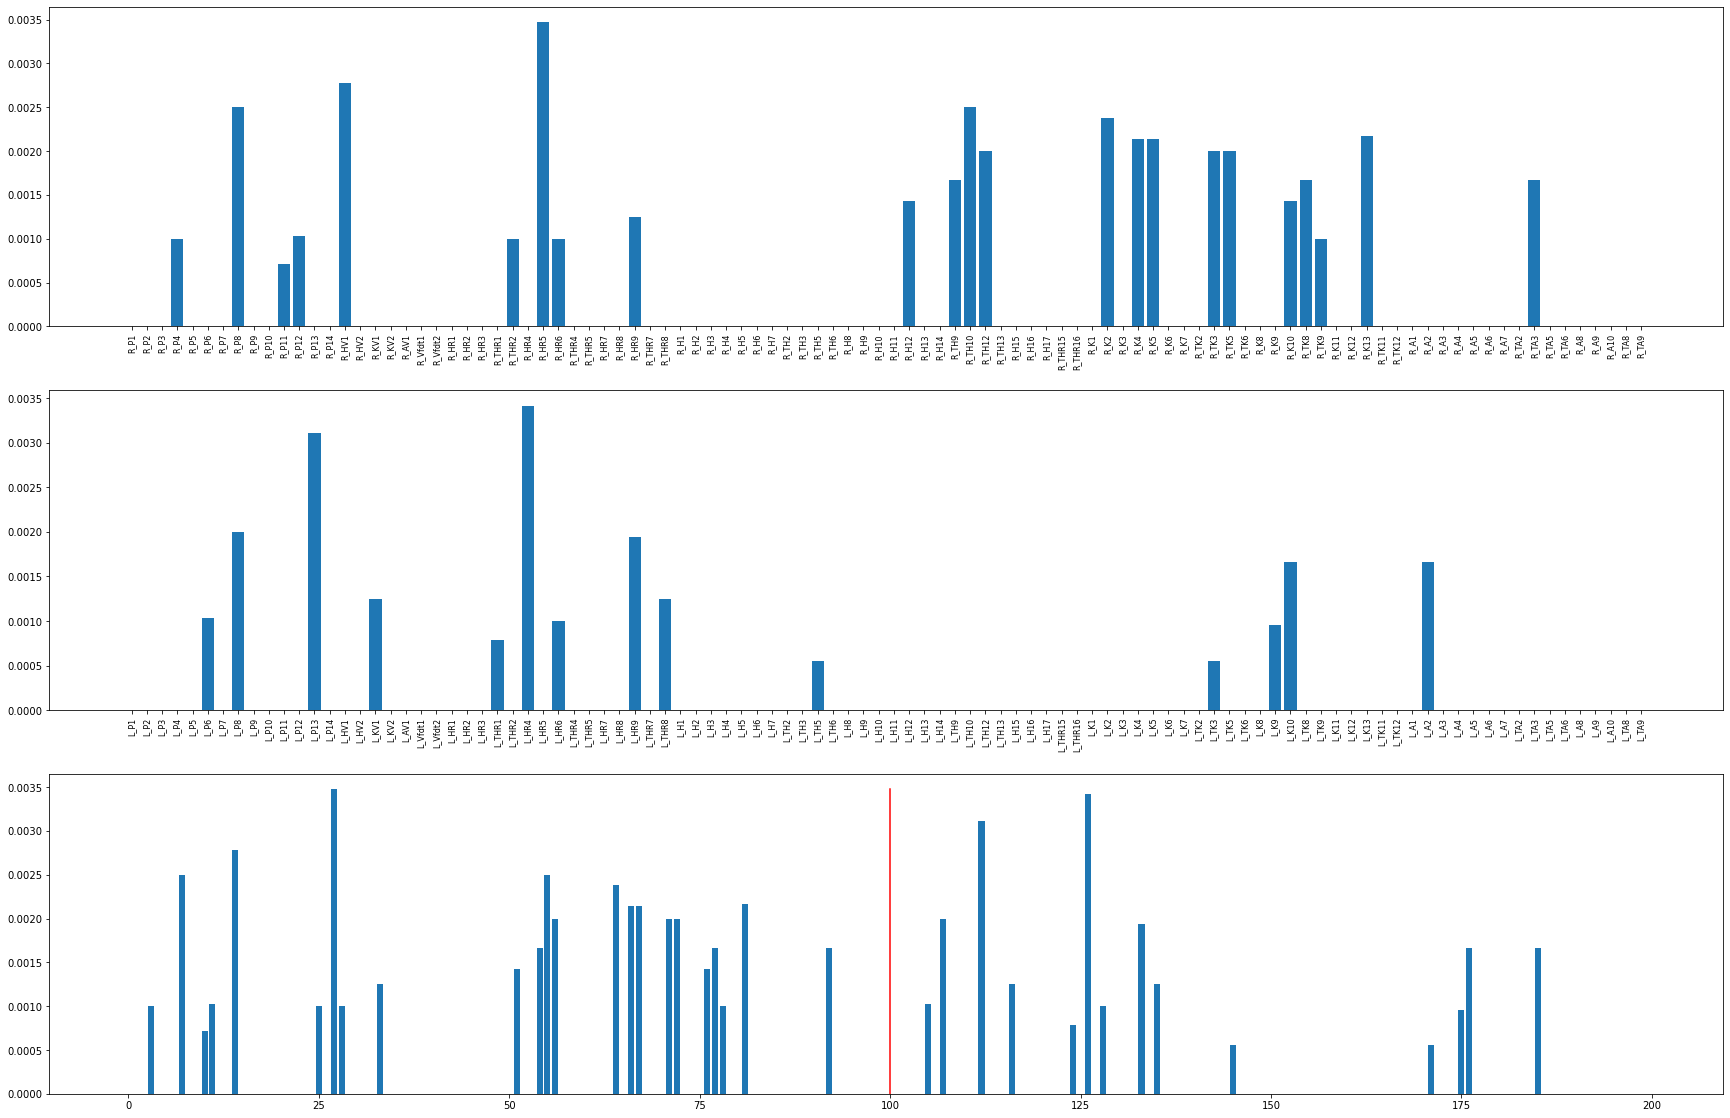

In [78]:
median_importances = np.median(feat_importances, axis=0)
MAD_importances = scipy.stats.median_abs_deviation(feat_importances, scale=1.0, axis=0)

plt.figure(figsize = (30,20))

plt.subplot(3,1,1)

mitad = int(len(median_importances)/2)
mitad_2 = int(len(field_names_all)/2)

plt.bar(range(0,mitad),median_importances[0:mitad])
plt.xticks(np.arange(0,mitad_2), field_names_all[0:mitad_2], 
           rotation= 90, fontsize = 8)

plt.subplot(3,1,2)

plt.bar(range(mitad,len(median_importances)),median_importances[mitad:])
plt.xticks(np.arange(mitad_2,len(field_names_all)), field_names_all[mitad_2:], 
           rotation= 90, fontsize = 8)


plt.subplot(3,1,3)

plt.bar(range(0,len(median_importances)),median_importances)
x_coordinates = [mitad, mitad]
y_coordinates = [0, max(median_importances)]
plt.plot(x_coordinates, y_coordinates, color = 'r')

plt.show()

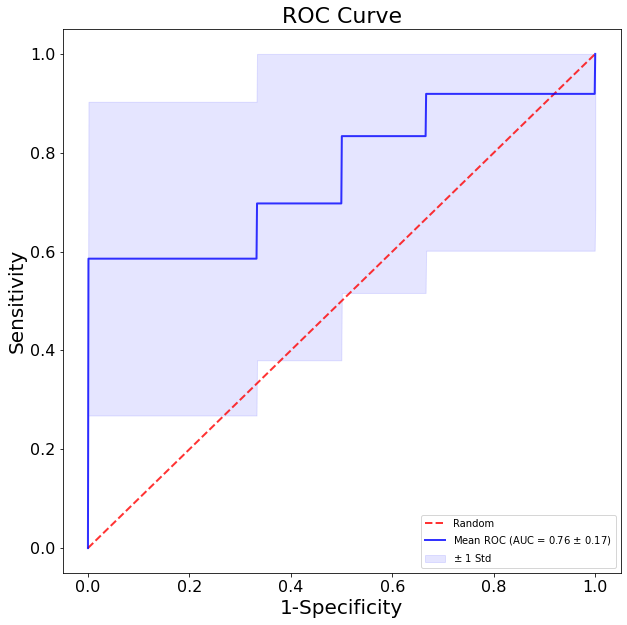

In [79]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111)

# Plot random ROC curve
Random_roc = ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

median_tpr = np.mean(tprs, axis=0)
median_tpr[-1] = 1.0
median_auc = auc(median_fpr, median_tpr)
MAD_auc = scipy.stats.median_abs_deviation(aucs, scale=1.0)
Median_roc = ax1.plot(median_fpr, median_tpr, color='b',
  label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (median_auc, MAD_auc),
  lw=2, alpha=.8)

MAD_tpr = np.std(tprs)
tprs_upper = np.minimum(median_tpr + MAD_tpr, 1)
tprs_lower = np.maximum(median_tpr - MAD_tpr, 0)
Median_tprs = ax1.fill_between(median_fpr, tprs_lower, tprs_upper, color='blue', alpha=.1,
  label=r'$\pm$ 1 Std')

# Display ROC curves
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
ax1.tick_params(labelsize=16)
plt.xlabel('1-Specificity', fontsize=20)
plt.ylabel('Sensitivity', fontsize=20)
plt.title('ROC Curve', fontsize=22)
plt.legend(loc="lower right")
plt.show()

## Next groups

In [19]:
field_names_list = data.columns.values
field_names_list = field_names_list

Patient_data_aux = data.values
Patient_data = []
for idx in range(0,len(Patient_data_aux)):
    Patient_data.append(Patient_data_aux[idx,0:])
Patient_data = np.array(Patient_data)

field_names_R = list('R_' + field_names_list)
field_names_L = list('L_' + field_names_list)
field_names_all = field_names_R + field_names_L

Patient_data_all = Patient_data.reshape(int(Patient_data.shape[0]/2), int(2*Patient_data.shape[1]))

n_samples, n_features = Patient_data_all.shape

print('Loaded dataset including',str(n_samples),'samples with',str(n_features),'features')

Loaded dataset including 34 samples with 200 features


In [20]:
print(Labels_sorted.index.tolist(), '\n')
print(Patient_data_all.shape)

Zero_list = Labels_sorted.index[Labels_sorted['NIVEL LESION V2.2'] == 0].tolist()
print(Zero_list)
One_list = Labels_sorted.index[Labels_sorted['NIVEL LESION V2.2'] == 1].tolist()
print(One_list)
Two_list = Labels_sorted.index[Labels_sorted['NIVEL LESION V2.2'] == 2].tolist()
print(Two_list)
Three_list = Labels_sorted.index[Labels_sorted['NIVEL LESION V2.2'] == 3].tolist()
print(Three_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] 

(34, 200)
[3, 8, 10, 11, 12, 13, 22, 25, 26, 28, 32]
[0, 1, 2, 4, 5, 6, 7, 15, 16, 21, 23, 24, 30, 33]
[17, 18, 19, 20]
[9, 14, 27, 29, 31]


In [21]:
upper_limbs = Zero_list + One_list
dorsal_muscles = Two_list + Three_list
upper_limbs = sorted(upper_limbs)
dorsal_muscles = sorted(dorsal_muscles)

print(upper_limbs, len(upper_limbs))
print(dorsal_muscles, len(dorsal_muscles))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 21, 22, 23, 24, 25, 26, 28, 30, 32, 33] 25
[9, 14, 17, 18, 19, 20, 27, 29, 31] 9


In [22]:
X = scaler.fit_transform(Patient_data_all)
X_upper_limbs = X[upper_limbs]
print(X_upper_limbs.shape, X.shape)

cond = Labels_sorted['NIVEL LESION V2.2'] == 0 
Y_1 = Labels_sorted[cond]['NIVEL LESION V2.2'].values
cond = Labels_sorted['NIVEL LESION V2.2'] == 1 
Y_2 = Labels_sorted[cond]['NIVEL LESION V2.2'].values

Y = np.concatenate((Y_1, Y_2))
print(Y.shape)

(25, 200) (34, 200)
(25,)


In [23]:
# Checking
j = 0
for i in upper_limbs:
    if (X_upper_limbs[j][0] == X[i][0]):
        j += 1
        continue
    else:
        print(j,i)
        j += 1

1    14
0    11
3     5
2     4
Name: NIVEL LESION V2.2, dtype: int64


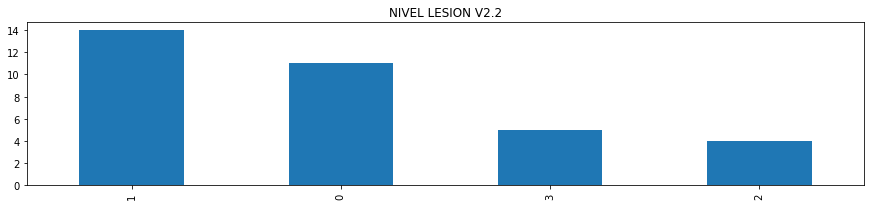

In [24]:
f, ax = plt.subplots(figsize=(15,3))
print(Labels_sorted['NIVEL LESION V2.2'].value_counts())
Hist = Labels_sorted['NIVEL LESION V2.2'].value_counts().plot.bar(title='NIVEL LESION V2.2')

In [25]:
n_splits = 4
n_repeats = 1000

cv = RepeatedStratifiedKFold(n_splits,n_repeats,random_state=36851234)

# Run classifier with cross-validation and plot boundaries and ROC curves

classifier = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.05, min_samples_leaf=4, min_samples_split=12, 
                                  n_estimators=100)
    
# make_pipeline (
#     SelectPercentile(score_func=f_classif, percentile=4),
#     StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.001, max_depth=3, max_features=0.9000000000000001, min_samples_leaf=12, min_samples_split=10, n_estimators=100, subsample=0.7500000000000001)),
#     SelectFwe(score_func=f_classif, alpha=0.011),
#     StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.7500000000000001, min_samples_leaf=9, min_samples_split=13, n_estimators=100)),
#     Nystroem(gamma=0.4, kernel="additive_chi2", n_components=n_features),
#     Nystroem(gamma=0.2, kernel="linear", n_components=n_features),
#     ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.05, min_samples_leaf=4, min_samples_split=12, n_estimators=100)
#)

Pass n_splits=4, n_repeats=1000 as keyword args. From version 0.25 passing these as positional arguments will result in an error


In [26]:
# Model Evaluation

performance_list = []
sensitivity_list = []
specificity_list = []

tprs = []   # True prediction errors
aucs = []   # Area unde_listr the curve
Ys = []
Zs = []
feat_importances = []

median_fpr = np.linspace(0, 1, 1000)


zzz = 0

for train, test in cv.split(X_upper_limbs, Y): 
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]
    
    Ys.extend(Y_test) 

    classifier.fit(X_train, Y_train)

    Z = classifier.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, Z[:, 1])   # Falpse positive and true positive rate
    roc_auc = auc(fpr, tpr) 
    
    
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_train)
    
    # SHapley Additive exPlanations
    # SHAP : impact of variables taking into account the interaction with other variables.
    
    Y_pred = classifier.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred, labels=[0,1]).ravel()

    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    
    
    performance_list.append(classifier.score(X_test,Y_test))
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    tprs.append(np.interp(median_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)
    Zs.extend(Z[:, 1])
    
    feat_importances.append(np.median(np.abs(shap_values[1]),axis=0))
    
    print('Results for iteration ',str(zzz),' computed.')
    zzz += 1
    
print('\n')
print('Final metrics')
print('\n')
print('Accuracy', np.mean(performance_list), ', STD : ', np.std(performance_list))
print('Sensitivity', np.mean(sensitivity_list), ', STD : ', np.std(sensitivity_list))
print('Specifity', np.mean(specificity_list), ', STD : ', np.std(specificity_list))



Results for iteration  0  computed.
Results for iteration  1  computed.
Results for iteration  2  computed.
Results for iteration  3  computed.
Results for iteration  4  computed.
Results for iteration  5  computed.
Results for iteration  6  computed.
Results for iteration  7  computed.
Results for iteration  8  computed.
Results for iteration  9  computed.
Results for iteration  10  computed.
Results for iteration  11  computed.
Results for iteration  12  computed.
Results for iteration  13  computed.
Results for iteration  14  computed.
Results for iteration  15  computed.
Results for iteration  16  computed.
Results for iteration  17  computed.
Results for iteration  18  computed.
Results for iteration  19  computed.
Results for iteration  20  computed.
Results for iteration  21  computed.
Results for iteration  22  computed.
Results for iteration  23  computed.
Results for iteration  24  computed.
Results for iteration  25  computed.
Results for iteration  26  computed.
Results for

Results for iteration  220  computed.
Results for iteration  221  computed.
Results for iteration  222  computed.
Results for iteration  223  computed.
Results for iteration  224  computed.
Results for iteration  225  computed.
Results for iteration  226  computed.
Results for iteration  227  computed.
Results for iteration  228  computed.
Results for iteration  229  computed.
Results for iteration  230  computed.
Results for iteration  231  computed.
Results for iteration  232  computed.
Results for iteration  233  computed.
Results for iteration  234  computed.
Results for iteration  235  computed.
Results for iteration  236  computed.
Results for iteration  237  computed.
Results for iteration  238  computed.
Results for iteration  239  computed.
Results for iteration  240  computed.
Results for iteration  241  computed.
Results for iteration  242  computed.
Results for iteration  243  computed.
Results for iteration  244  computed.
Results for iteration  245  computed.
Results for 

Results for iteration  436  computed.
Results for iteration  437  computed.
Results for iteration  438  computed.
Results for iteration  439  computed.
Results for iteration  440  computed.
Results for iteration  441  computed.
Results for iteration  442  computed.
Results for iteration  443  computed.
Results for iteration  444  computed.
Results for iteration  445  computed.
Results for iteration  446  computed.
Results for iteration  447  computed.
Results for iteration  448  computed.
Results for iteration  449  computed.
Results for iteration  450  computed.
Results for iteration  451  computed.
Results for iteration  452  computed.
Results for iteration  453  computed.
Results for iteration  454  computed.
Results for iteration  455  computed.
Results for iteration  456  computed.
Results for iteration  457  computed.
Results for iteration  458  computed.
Results for iteration  459  computed.
Results for iteration  460  computed.
Results for iteration  461  computed.
Results for 

Results for iteration  652  computed.
Results for iteration  653  computed.
Results for iteration  654  computed.
Results for iteration  655  computed.
Results for iteration  656  computed.
Results for iteration  657  computed.
Results for iteration  658  computed.
Results for iteration  659  computed.
Results for iteration  660  computed.
Results for iteration  661  computed.
Results for iteration  662  computed.
Results for iteration  663  computed.
Results for iteration  664  computed.
Results for iteration  665  computed.
Results for iteration  666  computed.
Results for iteration  667  computed.
Results for iteration  668  computed.
Results for iteration  669  computed.
Results for iteration  670  computed.
Results for iteration  671  computed.
Results for iteration  672  computed.
Results for iteration  673  computed.
Results for iteration  674  computed.
Results for iteration  675  computed.
Results for iteration  676  computed.
Results for iteration  677  computed.
Results for 

Results for iteration  868  computed.
Results for iteration  869  computed.
Results for iteration  870  computed.
Results for iteration  871  computed.
Results for iteration  872  computed.
Results for iteration  873  computed.
Results for iteration  874  computed.
Results for iteration  875  computed.
Results for iteration  876  computed.
Results for iteration  877  computed.
Results for iteration  878  computed.
Results for iteration  879  computed.
Results for iteration  880  computed.
Results for iteration  881  computed.
Results for iteration  882  computed.
Results for iteration  883  computed.
Results for iteration  884  computed.
Results for iteration  885  computed.
Results for iteration  886  computed.
Results for iteration  887  computed.
Results for iteration  888  computed.
Results for iteration  889  computed.
Results for iteration  890  computed.
Results for iteration  891  computed.
Results for iteration  892  computed.
Results for iteration  893  computed.
Results for 

Results for iteration  1082  computed.
Results for iteration  1083  computed.
Results for iteration  1084  computed.
Results for iteration  1085  computed.
Results for iteration  1086  computed.
Results for iteration  1087  computed.
Results for iteration  1088  computed.
Results for iteration  1089  computed.
Results for iteration  1090  computed.
Results for iteration  1091  computed.
Results for iteration  1092  computed.
Results for iteration  1093  computed.
Results for iteration  1094  computed.
Results for iteration  1095  computed.
Results for iteration  1096  computed.
Results for iteration  1097  computed.
Results for iteration  1098  computed.
Results for iteration  1099  computed.
Results for iteration  1100  computed.
Results for iteration  1101  computed.
Results for iteration  1102  computed.
Results for iteration  1103  computed.
Results for iteration  1104  computed.
Results for iteration  1105  computed.
Results for iteration  1106  computed.
Results for iteration  11

Results for iteration  1293  computed.
Results for iteration  1294  computed.
Results for iteration  1295  computed.
Results for iteration  1296  computed.
Results for iteration  1297  computed.
Results for iteration  1298  computed.
Results for iteration  1299  computed.
Results for iteration  1300  computed.
Results for iteration  1301  computed.
Results for iteration  1302  computed.
Results for iteration  1303  computed.
Results for iteration  1304  computed.
Results for iteration  1305  computed.
Results for iteration  1306  computed.
Results for iteration  1307  computed.
Results for iteration  1308  computed.
Results for iteration  1309  computed.
Results for iteration  1310  computed.
Results for iteration  1311  computed.
Results for iteration  1312  computed.
Results for iteration  1313  computed.
Results for iteration  1314  computed.
Results for iteration  1315  computed.
Results for iteration  1316  computed.
Results for iteration  1317  computed.
Results for iteration  13

Results for iteration  1504  computed.
Results for iteration  1505  computed.
Results for iteration  1506  computed.
Results for iteration  1507  computed.
Results for iteration  1508  computed.
Results for iteration  1509  computed.
Results for iteration  1510  computed.
Results for iteration  1511  computed.
Results for iteration  1512  computed.
Results for iteration  1513  computed.
Results for iteration  1514  computed.
Results for iteration  1515  computed.
Results for iteration  1516  computed.
Results for iteration  1517  computed.
Results for iteration  1518  computed.
Results for iteration  1519  computed.
Results for iteration  1520  computed.
Results for iteration  1521  computed.
Results for iteration  1522  computed.
Results for iteration  1523  computed.
Results for iteration  1524  computed.
Results for iteration  1525  computed.
Results for iteration  1526  computed.
Results for iteration  1527  computed.
Results for iteration  1528  computed.
Results for iteration  15

Results for iteration  1715  computed.
Results for iteration  1716  computed.
Results for iteration  1717  computed.
Results for iteration  1718  computed.
Results for iteration  1719  computed.
Results for iteration  1720  computed.
Results for iteration  1721  computed.
Results for iteration  1722  computed.
Results for iteration  1723  computed.
Results for iteration  1724  computed.
Results for iteration  1725  computed.
Results for iteration  1726  computed.
Results for iteration  1727  computed.
Results for iteration  1728  computed.
Results for iteration  1729  computed.
Results for iteration  1730  computed.
Results for iteration  1731  computed.
Results for iteration  1732  computed.
Results for iteration  1733  computed.
Results for iteration  1734  computed.
Results for iteration  1735  computed.
Results for iteration  1736  computed.
Results for iteration  1737  computed.
Results for iteration  1738  computed.
Results for iteration  1739  computed.
Results for iteration  17

Results for iteration  1926  computed.
Results for iteration  1927  computed.
Results for iteration  1928  computed.
Results for iteration  1929  computed.
Results for iteration  1930  computed.
Results for iteration  1931  computed.
Results for iteration  1932  computed.
Results for iteration  1933  computed.
Results for iteration  1934  computed.
Results for iteration  1935  computed.
Results for iteration  1936  computed.
Results for iteration  1937  computed.
Results for iteration  1938  computed.
Results for iteration  1939  computed.
Results for iteration  1940  computed.
Results for iteration  1941  computed.
Results for iteration  1942  computed.
Results for iteration  1943  computed.
Results for iteration  1944  computed.
Results for iteration  1945  computed.
Results for iteration  1946  computed.
Results for iteration  1947  computed.
Results for iteration  1948  computed.
Results for iteration  1949  computed.
Results for iteration  1950  computed.
Results for iteration  19

Results for iteration  2137  computed.
Results for iteration  2138  computed.
Results for iteration  2139  computed.
Results for iteration  2140  computed.
Results for iteration  2141  computed.
Results for iteration  2142  computed.
Results for iteration  2143  computed.
Results for iteration  2144  computed.
Results for iteration  2145  computed.
Results for iteration  2146  computed.
Results for iteration  2147  computed.
Results for iteration  2148  computed.
Results for iteration  2149  computed.
Results for iteration  2150  computed.
Results for iteration  2151  computed.
Results for iteration  2152  computed.
Results for iteration  2153  computed.
Results for iteration  2154  computed.
Results for iteration  2155  computed.
Results for iteration  2156  computed.
Results for iteration  2157  computed.
Results for iteration  2158  computed.
Results for iteration  2159  computed.
Results for iteration  2160  computed.
Results for iteration  2161  computed.
Results for iteration  21

Results for iteration  2349  computed.
Results for iteration  2350  computed.
Results for iteration  2351  computed.
Results for iteration  2352  computed.
Results for iteration  2353  computed.
Results for iteration  2354  computed.
Results for iteration  2355  computed.
Results for iteration  2356  computed.
Results for iteration  2357  computed.
Results for iteration  2358  computed.
Results for iteration  2359  computed.
Results for iteration  2360  computed.
Results for iteration  2361  computed.
Results for iteration  2362  computed.
Results for iteration  2363  computed.
Results for iteration  2364  computed.
Results for iteration  2365  computed.
Results for iteration  2366  computed.
Results for iteration  2367  computed.
Results for iteration  2368  computed.
Results for iteration  2369  computed.
Results for iteration  2370  computed.
Results for iteration  2371  computed.
Results for iteration  2372  computed.
Results for iteration  2373  computed.
Results for iteration  23

Results for iteration  2561  computed.
Results for iteration  2562  computed.
Results for iteration  2563  computed.
Results for iteration  2564  computed.
Results for iteration  2565  computed.
Results for iteration  2566  computed.
Results for iteration  2567  computed.
Results for iteration  2568  computed.
Results for iteration  2569  computed.
Results for iteration  2570  computed.
Results for iteration  2571  computed.
Results for iteration  2572  computed.
Results for iteration  2573  computed.
Results for iteration  2574  computed.
Results for iteration  2575  computed.
Results for iteration  2576  computed.
Results for iteration  2577  computed.
Results for iteration  2578  computed.
Results for iteration  2579  computed.
Results for iteration  2580  computed.
Results for iteration  2581  computed.
Results for iteration  2582  computed.
Results for iteration  2583  computed.
Results for iteration  2584  computed.
Results for iteration  2585  computed.
Results for iteration  25

Results for iteration  2772  computed.
Results for iteration  2773  computed.
Results for iteration  2774  computed.
Results for iteration  2775  computed.
Results for iteration  2776  computed.
Results for iteration  2777  computed.
Results for iteration  2778  computed.
Results for iteration  2779  computed.
Results for iteration  2780  computed.
Results for iteration  2781  computed.
Results for iteration  2782  computed.
Results for iteration  2783  computed.
Results for iteration  2784  computed.
Results for iteration  2785  computed.
Results for iteration  2786  computed.
Results for iteration  2787  computed.
Results for iteration  2788  computed.
Results for iteration  2789  computed.
Results for iteration  2790  computed.
Results for iteration  2791  computed.
Results for iteration  2792  computed.
Results for iteration  2793  computed.
Results for iteration  2794  computed.
Results for iteration  2795  computed.
Results for iteration  2796  computed.
Results for iteration  27

Results for iteration  2984  computed.
Results for iteration  2985  computed.
Results for iteration  2986  computed.
Results for iteration  2987  computed.
Results for iteration  2988  computed.
Results for iteration  2989  computed.
Results for iteration  2990  computed.
Results for iteration  2991  computed.
Results for iteration  2992  computed.
Results for iteration  2993  computed.
Results for iteration  2994  computed.
Results for iteration  2995  computed.
Results for iteration  2996  computed.
Results for iteration  2997  computed.
Results for iteration  2998  computed.
Results for iteration  2999  computed.
Results for iteration  3000  computed.
Results for iteration  3001  computed.
Results for iteration  3002  computed.
Results for iteration  3003  computed.
Results for iteration  3004  computed.
Results for iteration  3005  computed.
Results for iteration  3006  computed.
Results for iteration  3007  computed.
Results for iteration  3008  computed.
Results for iteration  30

Results for iteration  3196  computed.
Results for iteration  3197  computed.
Results for iteration  3198  computed.
Results for iteration  3199  computed.
Results for iteration  3200  computed.
Results for iteration  3201  computed.
Results for iteration  3202  computed.
Results for iteration  3203  computed.
Results for iteration  3204  computed.
Results for iteration  3205  computed.
Results for iteration  3206  computed.
Results for iteration  3207  computed.
Results for iteration  3208  computed.
Results for iteration  3209  computed.
Results for iteration  3210  computed.
Results for iteration  3211  computed.
Results for iteration  3212  computed.
Results for iteration  3213  computed.
Results for iteration  3214  computed.
Results for iteration  3215  computed.
Results for iteration  3216  computed.
Results for iteration  3217  computed.
Results for iteration  3218  computed.
Results for iteration  3219  computed.
Results for iteration  3220  computed.
Results for iteration  32

Results for iteration  3407  computed.
Results for iteration  3408  computed.
Results for iteration  3409  computed.
Results for iteration  3410  computed.
Results for iteration  3411  computed.
Results for iteration  3412  computed.
Results for iteration  3413  computed.
Results for iteration  3414  computed.
Results for iteration  3415  computed.
Results for iteration  3416  computed.
Results for iteration  3417  computed.
Results for iteration  3418  computed.
Results for iteration  3419  computed.
Results for iteration  3420  computed.
Results for iteration  3421  computed.
Results for iteration  3422  computed.
Results for iteration  3423  computed.
Results for iteration  3424  computed.
Results for iteration  3425  computed.
Results for iteration  3426  computed.
Results for iteration  3427  computed.
Results for iteration  3428  computed.
Results for iteration  3429  computed.
Results for iteration  3430  computed.
Results for iteration  3431  computed.
Results for iteration  34

Results for iteration  3619  computed.
Results for iteration  3620  computed.
Results for iteration  3621  computed.
Results for iteration  3622  computed.
Results for iteration  3623  computed.
Results for iteration  3624  computed.
Results for iteration  3625  computed.
Results for iteration  3626  computed.
Results for iteration  3627  computed.
Results for iteration  3628  computed.
Results for iteration  3629  computed.
Results for iteration  3630  computed.
Results for iteration  3631  computed.
Results for iteration  3632  computed.
Results for iteration  3633  computed.
Results for iteration  3634  computed.
Results for iteration  3635  computed.
Results for iteration  3636  computed.
Results for iteration  3637  computed.
Results for iteration  3638  computed.
Results for iteration  3639  computed.
Results for iteration  3640  computed.
Results for iteration  3641  computed.
Results for iteration  3642  computed.
Results for iteration  3643  computed.
Results for iteration  36

Results for iteration  3831  computed.
Results for iteration  3832  computed.
Results for iteration  3833  computed.
Results for iteration  3834  computed.
Results for iteration  3835  computed.
Results for iteration  3836  computed.
Results for iteration  3837  computed.
Results for iteration  3838  computed.
Results for iteration  3839  computed.
Results for iteration  3840  computed.
Results for iteration  3841  computed.
Results for iteration  3842  computed.
Results for iteration  3843  computed.
Results for iteration  3844  computed.
Results for iteration  3845  computed.
Results for iteration  3846  computed.
Results for iteration  3847  computed.
Results for iteration  3848  computed.
Results for iteration  3849  computed.
Results for iteration  3850  computed.
Results for iteration  3851  computed.
Results for iteration  3852  computed.
Results for iteration  3853  computed.
Results for iteration  3854  computed.
Results for iteration  3855  computed.
Results for iteration  38

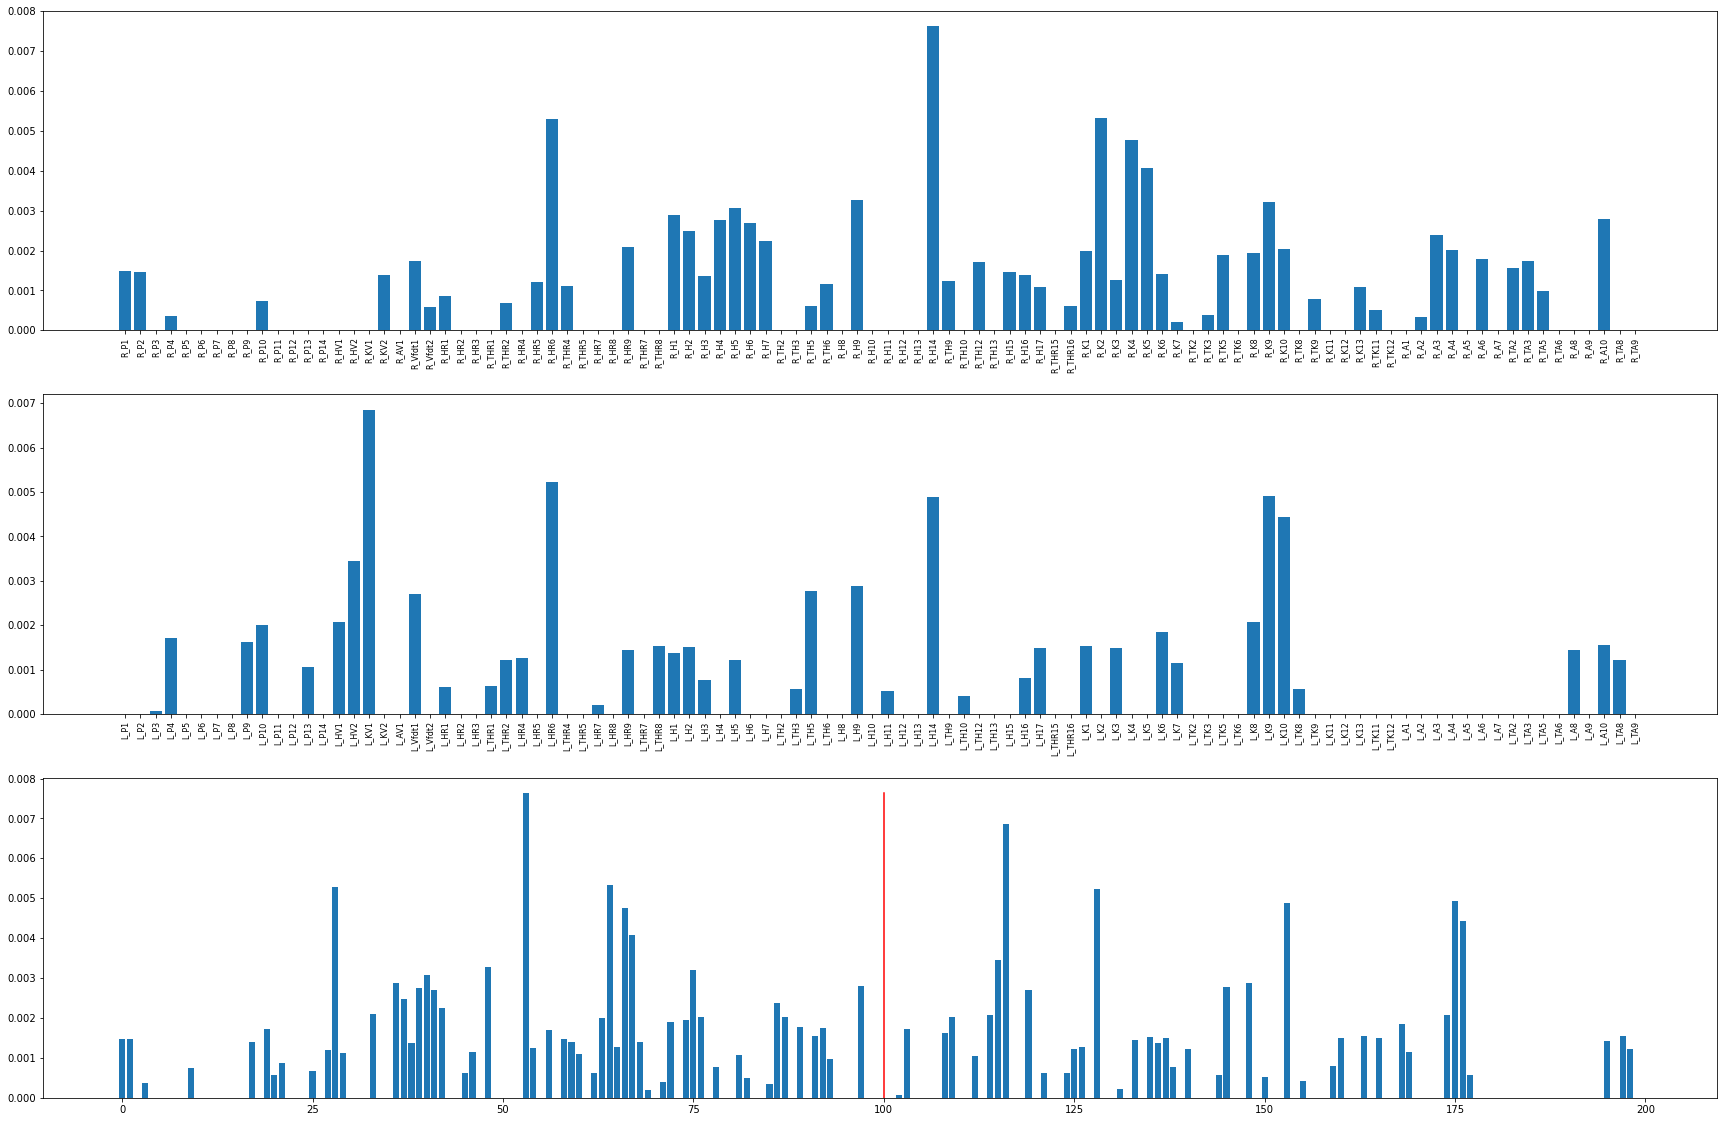

In [27]:
median_importances = np.median(feat_importances, axis=0)
MAD_importances = scipy.stats.median_abs_deviation(feat_importances, scale=1.0, axis=0)

plt.figure(figsize = (30,20))

plt.subplot(3,1,1)

mitad = int(len(median_importances)/2)
mitad_2 = int(len(field_names_all)/2)

plt.bar(range(0,mitad),median_importances[0:mitad])
plt.xticks(np.arange(0,mitad_2), field_names_all[0:mitad_2], 
           rotation= 90, fontsize = 8)

plt.subplot(3,1,2)

plt.bar(range(mitad,len(median_importances)),median_importances[mitad:])
plt.xticks(np.arange(mitad_2,len(field_names_all)), field_names_all[mitad_2:], 
           rotation= 90, fontsize = 8)


plt.subplot(3,1,3)

plt.bar(range(0,len(median_importances)),median_importances)
x_coordinates = [mitad, mitad]
y_coordinates = [0, max(median_importances)]
plt.plot(x_coordinates, y_coordinates, color = 'r')

plt.show()

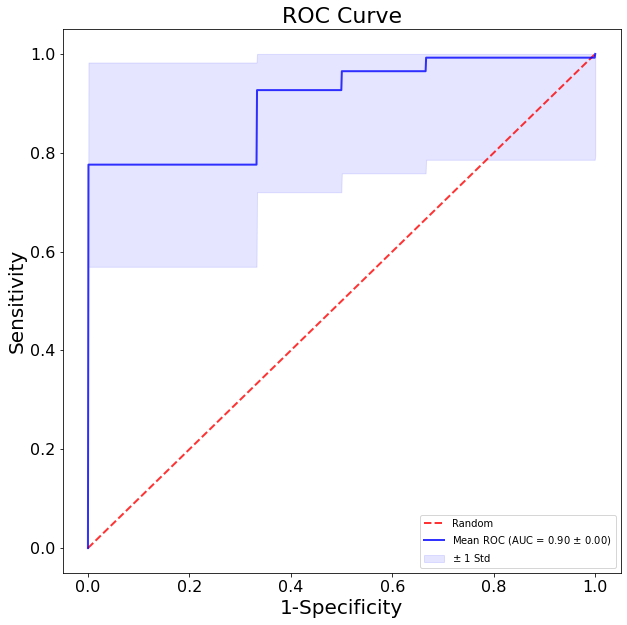

In [28]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111)

# Plot random ROC curve
Random_roc = ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

median_tpr = np.mean(tprs, axis=0)
median_tpr[-1] = 1.0
median_auc = auc(median_fpr, median_tpr)
MAD_auc = scipy.stats.median_abs_deviation(aucs, scale=1.0)
Median_roc = ax1.plot(median_fpr, median_tpr, color='b',
  label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (median_auc, MAD_auc),
  lw=2, alpha=.8)

MAD_tpr = np.std(tprs)
tprs_upper = np.minimum(median_tpr + MAD_tpr, 1)
tprs_lower = np.maximum(median_tpr - MAD_tpr, 0)
Median_tprs = ax1.fill_between(median_fpr, tprs_lower, tprs_upper, color='blue', alpha=.1,
  label=r'$\pm$ 1 Std')

# Display ROC curves
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
ax1.tick_params(labelsize=16)
plt.xlabel('1-Specificity', fontsize=20)
plt.ylabel('Sensitivity', fontsize=20)
plt.title('ROC Curve', fontsize=22)
plt.legend(loc="lower right")
plt.show()

## Last group

In [29]:
# #############################################################################
# Classification and ROC analysis

# Split the dataset into training and test sets using a K fold approach

n_splits = 4
n_repeats = 10

cv = RepeatedStratifiedKFold(n_splits,n_repeats,random_state=36851234)

# Run classifier with cross-validation and plot boundaries and ROC curves

classifier = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.05, min_samples_leaf=4, min_samples_split=12, 
                                  n_estimators=100)

#classifier = make_pipeline (
    #SelectPercentile(score_func=f_classif, percentile=4),
    #StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.001, max_depth=3, max_features=0.9000000000000001, min_samples_leaf=12, min_samples_split=10, n_estimators=100, subsample=0.7500000000000001)),
    #SelectFwe(score_func=f_classif, alpha=0.011),
    #StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.7500000000000001, min_samples_leaf=9, min_samples_split=13, n_estimators=100)),
    #Nystroem(gamma=0.4, kernel="additive_chi2", n_components=n_features),
    #Nystroem(gamma=0.2, kernel="linear", n_components=n_features),
    #ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.05, min_samples_leaf=4, min_samples_split=12, n_estimators=100
#                        ))

Pass n_splits=4, n_repeats=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error


In [30]:
X = scaler.fit_transform(Patient_data_all)
X_dorsal_muscles = X[dorsal_muscles]
print(X_dorsal_muscles.shape, X.shape)

cond = Labels_sorted['NIVEL LESION V2.2'] == 2 
Y_1 = Labels_sorted[cond]['NIVEL LESION V2.2'].values
cond = Labels_sorted['NIVEL LESION V2.2'] == 3 
Y_2 = Labels_sorted[cond]['NIVEL LESION V2.2'].values

Y = np.concatenate((Y_1, Y_2))
print(Y.shape)

# Checking
j = 0
for i in dorsal_muscles:
    if (X_dorsal_muscles[j][0] == X[i][0]):
        j += 1
        continue
    else:
        print(j,i)
        j += 1

(9, 200) (34, 200)
(9,)


In [31]:
n_splits = 4
n_repeats = 1000

cv = RepeatedStratifiedKFold(n_splits,n_repeats,random_state=36851234)

# Run classifier with cross-validation and plot boundaries and ROC curves

classifier = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.05, min_samples_leaf=4, min_samples_split=12, 
                                  n_estimators=100)
    
# make_pipeline (
#     SelectPercentile(score_func=f_classif, percentile=4),
#     StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.001, max_depth=3, max_features=0.9000000000000001, min_samples_leaf=12, min_samples_split=10, n_estimators=100, subsample=0.7500000000000001)),
#     SelectFwe(score_func=f_classif, alpha=0.011),
#     StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.7500000000000001, min_samples_leaf=9, min_samples_split=13, n_estimators=100)),
#     Nystroem(gamma=0.4, kernel="additive_chi2", n_components=n_features),
#     Nystroem(gamma=0.2, kernel="linear", n_components=n_features),
#     ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.05, min_samples_leaf=4, min_samples_split=12, n_estimators=100)
#)

Pass n_splits=4, n_repeats=1000 as keyword args. From version 0.25 passing these as positional arguments will result in an error


### Replace (2,3) with (0,1)

In [32]:
print(X_dorsal_muscles)
print(Y)
Y = np.where(Y == 2, 0, Y)
print(Y)
Y = np.where(Y == 3, 1, Y)
print(Y)

[[0.5970693  0.4029307  0.66433778 ... 0.1560594  1.         0.82591755]
 [1.         0.         0.25318348 ... 0.30861425 0.6272142  1.        ]
 [0.70769323 0.29230677 0.87752276 ... 0.56377912 0.69794896 0.33210841]
 ...
 [0.48281884 0.51718116 0.79088452 ... 0.23486359 0.88946634 0.82370145]
 [0.4778348  0.5221652  0.46363417 ... 0.25117303 0.         0.88528584]
 [0.38918487 0.61081513 0.8860043  ... 0.34757747 0.76927891 0.84913478]]
[2 2 2 2 3 3 3 3 3]
[0 0 0 0 3 3 3 3 3]
[0 0 0 0 1 1 1 1 1]


In [33]:
# Model Evaluation

performance_list = []
sensitivity_list = []
specificity_list = []

tprs = []   # True prediction errors
aucs = []   # Area unde_listr the curve
Ys = []
Zs = []
feat_importances = []

median_fpr = np.linspace(0, 1, 1000)


zzz = 0

for train, test in cv.split(X_dorsal_muscles, Y): 
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]
    
    Ys.extend(Y_test) 

    classifier.fit(X_train, Y_train)

    Z = classifier.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, Z[:, 1])   # Falpse positive and true positive rate
    roc_auc = auc(fpr, tpr) 
    
    
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_train)
    
    # SHapley Additive exPlanations
    # SHAP : impact of variables taking into account the interaction with other variables.
    
    Y_pred = classifier.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred, labels=[0,1]).ravel()

    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    
    
    performance_list.append(classifier.score(X_test,Y_test))
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    tprs.append(np.interp(median_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)
    Zs.extend(Z[:, 1])
    
    feat_importances.append(np.median(np.abs(shap_values[1]),axis=0))
    
    print('Results for iteration ',str(zzz),' computed.')
    zzz += 1
    
print('\n')
print('Final metrics')
print('\n')
print('Accuracy', np.mean(performance_list), ', STD : ', np.std(performance_list))
print('Sensitivity', np.mean(sensitivity_list), ', STD : ', np.std(sensitivity_list))
print('Specifity', np.mean(specificity_list), ', STD : ', np.std(specificity_list))


Results for iteration  0  computed.
Results for iteration  1  computed.
Results for iteration  2  computed.
Results for iteration  3  computed.
Results for iteration  4  computed.
Results for iteration  5  computed.
Results for iteration  6  computed.
Results for iteration  7  computed.
Results for iteration  8  computed.
Results for iteration  9  computed.
Results for iteration  10  computed.
Results for iteration  11  computed.
Results for iteration  12  computed.
Results for iteration  13  computed.
Results for iteration  14  computed.
Results for iteration  15  computed.
Results for iteration  16  computed.
Results for iteration  17  computed.
Results for iteration  18  computed.
Results for iteration  19  computed.
Results for iteration  20  computed.
Results for iteration  21  computed.
Results for iteration  22  computed.
Results for iteration  23  computed.
Results for iteration  24  computed.
Results for iteration  25  computed.
Results for iteration  26  computed.
Results for

Results for iteration  219  computed.
Results for iteration  220  computed.
Results for iteration  221  computed.
Results for iteration  222  computed.
Results for iteration  223  computed.
Results for iteration  224  computed.
Results for iteration  225  computed.
Results for iteration  226  computed.
Results for iteration  227  computed.
Results for iteration  228  computed.
Results for iteration  229  computed.
Results for iteration  230  computed.
Results for iteration  231  computed.
Results for iteration  232  computed.
Results for iteration  233  computed.
Results for iteration  234  computed.
Results for iteration  235  computed.
Results for iteration  236  computed.
Results for iteration  237  computed.
Results for iteration  238  computed.
Results for iteration  239  computed.
Results for iteration  240  computed.
Results for iteration  241  computed.
Results for iteration  242  computed.
Results for iteration  243  computed.
Results for iteration  244  computed.
Results for 

Results for iteration  436  computed.
Results for iteration  437  computed.
Results for iteration  438  computed.
Results for iteration  439  computed.
Results for iteration  440  computed.
Results for iteration  441  computed.
Results for iteration  442  computed.
Results for iteration  443  computed.
Results for iteration  444  computed.
Results for iteration  445  computed.
Results for iteration  446  computed.
Results for iteration  447  computed.
Results for iteration  448  computed.
Results for iteration  449  computed.
Results for iteration  450  computed.
Results for iteration  451  computed.
Results for iteration  452  computed.
Results for iteration  453  computed.
Results for iteration  454  computed.
Results for iteration  455  computed.
Results for iteration  456  computed.
Results for iteration  457  computed.
Results for iteration  458  computed.
Results for iteration  459  computed.
Results for iteration  460  computed.
Results for iteration  461  computed.
Results for 

Results for iteration  652  computed.
Results for iteration  653  computed.
Results for iteration  654  computed.
Results for iteration  655  computed.
Results for iteration  656  computed.
Results for iteration  657  computed.
Results for iteration  658  computed.
Results for iteration  659  computed.
Results for iteration  660  computed.
Results for iteration  661  computed.
Results for iteration  662  computed.
Results for iteration  663  computed.
Results for iteration  664  computed.
Results for iteration  665  computed.
Results for iteration  666  computed.
Results for iteration  667  computed.
Results for iteration  668  computed.
Results for iteration  669  computed.
Results for iteration  670  computed.
Results for iteration  671  computed.
Results for iteration  672  computed.
Results for iteration  673  computed.
Results for iteration  674  computed.
Results for iteration  675  computed.
Results for iteration  676  computed.
Results for iteration  677  computed.
Results for 

Results for iteration  868  computed.
Results for iteration  869  computed.
Results for iteration  870  computed.
Results for iteration  871  computed.
Results for iteration  872  computed.
Results for iteration  873  computed.
Results for iteration  874  computed.
Results for iteration  875  computed.
Results for iteration  876  computed.
Results for iteration  877  computed.
Results for iteration  878  computed.
Results for iteration  879  computed.
Results for iteration  880  computed.
Results for iteration  881  computed.
Results for iteration  882  computed.
Results for iteration  883  computed.
Results for iteration  884  computed.
Results for iteration  885  computed.
Results for iteration  886  computed.
Results for iteration  887  computed.
Results for iteration  888  computed.
Results for iteration  889  computed.
Results for iteration  890  computed.
Results for iteration  891  computed.
Results for iteration  892  computed.
Results for iteration  893  computed.
Results for 

Results for iteration  1082  computed.
Results for iteration  1083  computed.
Results for iteration  1084  computed.
Results for iteration  1085  computed.
Results for iteration  1086  computed.
Results for iteration  1087  computed.
Results for iteration  1088  computed.
Results for iteration  1089  computed.
Results for iteration  1090  computed.
Results for iteration  1091  computed.
Results for iteration  1092  computed.
Results for iteration  1093  computed.
Results for iteration  1094  computed.
Results for iteration  1095  computed.
Results for iteration  1096  computed.
Results for iteration  1097  computed.
Results for iteration  1098  computed.
Results for iteration  1099  computed.
Results for iteration  1100  computed.
Results for iteration  1101  computed.
Results for iteration  1102  computed.
Results for iteration  1103  computed.
Results for iteration  1104  computed.
Results for iteration  1105  computed.
Results for iteration  1106  computed.
Results for iteration  11

Results for iteration  1294  computed.
Results for iteration  1295  computed.
Results for iteration  1296  computed.
Results for iteration  1297  computed.
Results for iteration  1298  computed.
Results for iteration  1299  computed.
Results for iteration  1300  computed.
Results for iteration  1301  computed.
Results for iteration  1302  computed.
Results for iteration  1303  computed.
Results for iteration  1304  computed.
Results for iteration  1305  computed.
Results for iteration  1306  computed.
Results for iteration  1307  computed.
Results for iteration  1308  computed.
Results for iteration  1309  computed.
Results for iteration  1310  computed.
Results for iteration  1311  computed.
Results for iteration  1312  computed.
Results for iteration  1313  computed.
Results for iteration  1314  computed.
Results for iteration  1315  computed.
Results for iteration  1316  computed.
Results for iteration  1317  computed.
Results for iteration  1318  computed.
Results for iteration  13

Results for iteration  1505  computed.
Results for iteration  1506  computed.
Results for iteration  1507  computed.
Results for iteration  1508  computed.
Results for iteration  1509  computed.
Results for iteration  1510  computed.
Results for iteration  1511  computed.
Results for iteration  1512  computed.
Results for iteration  1513  computed.
Results for iteration  1514  computed.
Results for iteration  1515  computed.
Results for iteration  1516  computed.
Results for iteration  1517  computed.
Results for iteration  1518  computed.
Results for iteration  1519  computed.
Results for iteration  1520  computed.
Results for iteration  1521  computed.
Results for iteration  1522  computed.
Results for iteration  1523  computed.
Results for iteration  1524  computed.
Results for iteration  1525  computed.
Results for iteration  1526  computed.
Results for iteration  1527  computed.
Results for iteration  1528  computed.
Results for iteration  1529  computed.
Results for iteration  15

Results for iteration  1717  computed.
Results for iteration  1718  computed.
Results for iteration  1719  computed.
Results for iteration  1720  computed.
Results for iteration  1721  computed.
Results for iteration  1722  computed.
Results for iteration  1723  computed.
Results for iteration  1724  computed.
Results for iteration  1725  computed.
Results for iteration  1726  computed.
Results for iteration  1727  computed.
Results for iteration  1728  computed.
Results for iteration  1729  computed.
Results for iteration  1730  computed.
Results for iteration  1731  computed.
Results for iteration  1732  computed.
Results for iteration  1733  computed.
Results for iteration  1734  computed.
Results for iteration  1735  computed.
Results for iteration  1736  computed.
Results for iteration  1737  computed.
Results for iteration  1738  computed.
Results for iteration  1739  computed.
Results for iteration  1740  computed.
Results for iteration  1741  computed.
Results for iteration  17

Results for iteration  1928  computed.
Results for iteration  1929  computed.
Results for iteration  1930  computed.
Results for iteration  1931  computed.
Results for iteration  1932  computed.
Results for iteration  1933  computed.
Results for iteration  1934  computed.
Results for iteration  1935  computed.
Results for iteration  1936  computed.
Results for iteration  1937  computed.
Results for iteration  1938  computed.
Results for iteration  1939  computed.
Results for iteration  1940  computed.
Results for iteration  1941  computed.
Results for iteration  1942  computed.
Results for iteration  1943  computed.
Results for iteration  1944  computed.
Results for iteration  1945  computed.
Results for iteration  1946  computed.
Results for iteration  1947  computed.
Results for iteration  1948  computed.
Results for iteration  1949  computed.
Results for iteration  1950  computed.
Results for iteration  1951  computed.
Results for iteration  1952  computed.
Results for iteration  19

Results for iteration  2139  computed.
Results for iteration  2140  computed.
Results for iteration  2141  computed.
Results for iteration  2142  computed.
Results for iteration  2143  computed.
Results for iteration  2144  computed.
Results for iteration  2145  computed.
Results for iteration  2146  computed.
Results for iteration  2147  computed.
Results for iteration  2148  computed.
Results for iteration  2149  computed.
Results for iteration  2150  computed.
Results for iteration  2151  computed.
Results for iteration  2152  computed.
Results for iteration  2153  computed.
Results for iteration  2154  computed.
Results for iteration  2155  computed.
Results for iteration  2156  computed.
Results for iteration  2157  computed.
Results for iteration  2158  computed.
Results for iteration  2159  computed.
Results for iteration  2160  computed.
Results for iteration  2161  computed.
Results for iteration  2162  computed.
Results for iteration  2163  computed.
Results for iteration  21

Results for iteration  2350  computed.
Results for iteration  2351  computed.
Results for iteration  2352  computed.
Results for iteration  2353  computed.
Results for iteration  2354  computed.
Results for iteration  2355  computed.
Results for iteration  2356  computed.
Results for iteration  2357  computed.
Results for iteration  2358  computed.
Results for iteration  2359  computed.
Results for iteration  2360  computed.
Results for iteration  2361  computed.
Results for iteration  2362  computed.
Results for iteration  2363  computed.
Results for iteration  2364  computed.
Results for iteration  2365  computed.
Results for iteration  2366  computed.
Results for iteration  2367  computed.
Results for iteration  2368  computed.
Results for iteration  2369  computed.
Results for iteration  2370  computed.
Results for iteration  2371  computed.
Results for iteration  2372  computed.
Results for iteration  2373  computed.
Results for iteration  2374  computed.
Results for iteration  23

Results for iteration  2561  computed.
Results for iteration  2562  computed.
Results for iteration  2563  computed.
Results for iteration  2564  computed.
Results for iteration  2565  computed.
Results for iteration  2566  computed.
Results for iteration  2567  computed.
Results for iteration  2568  computed.
Results for iteration  2569  computed.
Results for iteration  2570  computed.
Results for iteration  2571  computed.
Results for iteration  2572  computed.
Results for iteration  2573  computed.
Results for iteration  2574  computed.
Results for iteration  2575  computed.
Results for iteration  2576  computed.
Results for iteration  2577  computed.
Results for iteration  2578  computed.
Results for iteration  2579  computed.
Results for iteration  2580  computed.
Results for iteration  2581  computed.
Results for iteration  2582  computed.
Results for iteration  2583  computed.
Results for iteration  2584  computed.
Results for iteration  2585  computed.
Results for iteration  25

Results for iteration  2773  computed.
Results for iteration  2774  computed.
Results for iteration  2775  computed.
Results for iteration  2776  computed.
Results for iteration  2777  computed.
Results for iteration  2778  computed.
Results for iteration  2779  computed.
Results for iteration  2780  computed.
Results for iteration  2781  computed.
Results for iteration  2782  computed.
Results for iteration  2783  computed.
Results for iteration  2784  computed.
Results for iteration  2785  computed.
Results for iteration  2786  computed.
Results for iteration  2787  computed.
Results for iteration  2788  computed.
Results for iteration  2789  computed.
Results for iteration  2790  computed.
Results for iteration  2791  computed.
Results for iteration  2792  computed.
Results for iteration  2793  computed.
Results for iteration  2794  computed.
Results for iteration  2795  computed.
Results for iteration  2796  computed.
Results for iteration  2797  computed.
Results for iteration  27

Results for iteration  2984  computed.
Results for iteration  2985  computed.
Results for iteration  2986  computed.
Results for iteration  2987  computed.
Results for iteration  2988  computed.
Results for iteration  2989  computed.
Results for iteration  2990  computed.
Results for iteration  2991  computed.
Results for iteration  2992  computed.
Results for iteration  2993  computed.
Results for iteration  2994  computed.
Results for iteration  2995  computed.
Results for iteration  2996  computed.
Results for iteration  2997  computed.
Results for iteration  2998  computed.
Results for iteration  2999  computed.
Results for iteration  3000  computed.
Results for iteration  3001  computed.
Results for iteration  3002  computed.
Results for iteration  3003  computed.
Results for iteration  3004  computed.
Results for iteration  3005  computed.
Results for iteration  3006  computed.
Results for iteration  3007  computed.
Results for iteration  3008  computed.
Results for iteration  30

Results for iteration  3196  computed.
Results for iteration  3197  computed.
Results for iteration  3198  computed.
Results for iteration  3199  computed.
Results for iteration  3200  computed.
Results for iteration  3201  computed.
Results for iteration  3202  computed.
Results for iteration  3203  computed.
Results for iteration  3204  computed.
Results for iteration  3205  computed.
Results for iteration  3206  computed.
Results for iteration  3207  computed.
Results for iteration  3208  computed.
Results for iteration  3209  computed.
Results for iteration  3210  computed.
Results for iteration  3211  computed.
Results for iteration  3212  computed.
Results for iteration  3213  computed.
Results for iteration  3214  computed.
Results for iteration  3215  computed.
Results for iteration  3216  computed.
Results for iteration  3217  computed.
Results for iteration  3218  computed.
Results for iteration  3219  computed.
Results for iteration  3220  computed.
Results for iteration  32

Results for iteration  3408  computed.
Results for iteration  3409  computed.
Results for iteration  3410  computed.
Results for iteration  3411  computed.
Results for iteration  3412  computed.
Results for iteration  3413  computed.
Results for iteration  3414  computed.
Results for iteration  3415  computed.
Results for iteration  3416  computed.
Results for iteration  3417  computed.
Results for iteration  3418  computed.
Results for iteration  3419  computed.
Results for iteration  3420  computed.
Results for iteration  3421  computed.
Results for iteration  3422  computed.
Results for iteration  3423  computed.
Results for iteration  3424  computed.
Results for iteration  3425  computed.
Results for iteration  3426  computed.
Results for iteration  3427  computed.
Results for iteration  3428  computed.
Results for iteration  3429  computed.
Results for iteration  3430  computed.
Results for iteration  3431  computed.
Results for iteration  3432  computed.
Results for iteration  34

Results for iteration  3619  computed.
Results for iteration  3620  computed.
Results for iteration  3621  computed.
Results for iteration  3622  computed.
Results for iteration  3623  computed.
Results for iteration  3624  computed.
Results for iteration  3625  computed.
Results for iteration  3626  computed.
Results for iteration  3627  computed.
Results for iteration  3628  computed.
Results for iteration  3629  computed.
Results for iteration  3630  computed.
Results for iteration  3631  computed.
Results for iteration  3632  computed.
Results for iteration  3633  computed.
Results for iteration  3634  computed.
Results for iteration  3635  computed.
Results for iteration  3636  computed.
Results for iteration  3637  computed.
Results for iteration  3638  computed.
Results for iteration  3639  computed.
Results for iteration  3640  computed.
Results for iteration  3641  computed.
Results for iteration  3642  computed.
Results for iteration  3643  computed.
Results for iteration  36

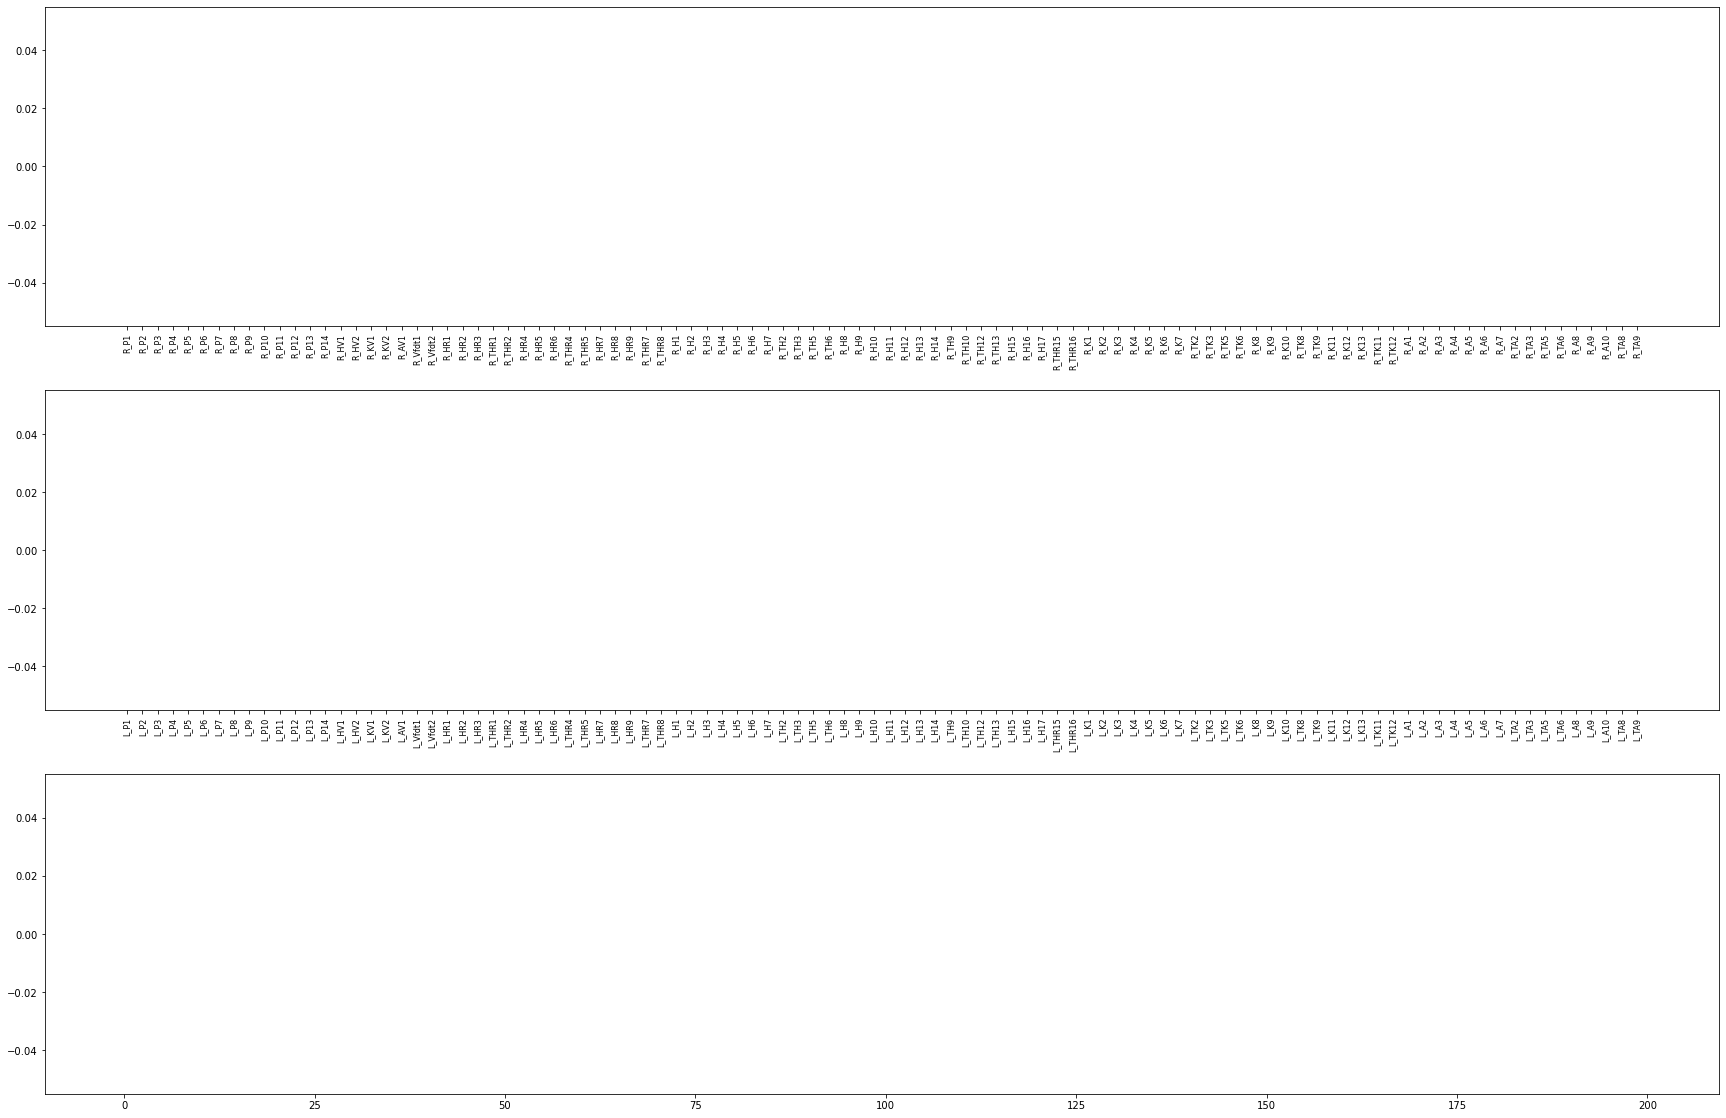

In [34]:
median_importances = np.median(feat_importances, axis=0)
MAD_importances = scipy.stats.median_abs_deviation(feat_importances, scale=1.0, axis=0)

plt.figure(figsize = (30,20))

plt.subplot(3,1,1)

mitad = int(len(median_importances)/2)
mitad_2 = int(len(field_names_all)/2)

plt.bar(range(0,mitad),median_importances[0:mitad])
plt.xticks(np.arange(0,mitad_2), field_names_all[0:mitad_2], 
           rotation= 90, fontsize = 8)

plt.subplot(3,1,2)

plt.bar(range(mitad,len(median_importances)),median_importances[mitad:])
plt.xticks(np.arange(mitad_2,len(field_names_all)), field_names_all[mitad_2:], 
           rotation= 90, fontsize = 8)


plt.subplot(3,1,3)

plt.bar(range(0,len(median_importances)),median_importances)
x_coordinates = [mitad, mitad]
y_coordinates = [0, max(median_importances)]
plt.plot(x_coordinates, y_coordinates, color = 'r')

plt.show()

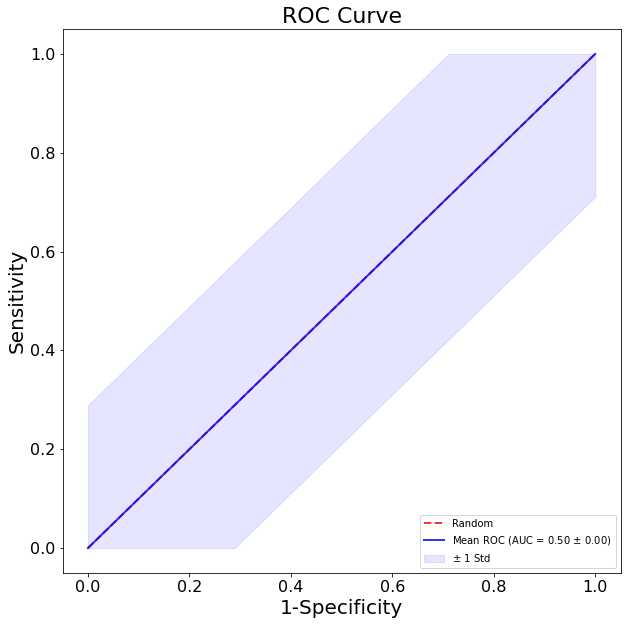

In [35]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111)

# Plot random ROC curve
Random_roc = ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

median_tpr = np.mean(tprs, axis=0)
median_tpr[-1] = 1.0
median_auc = auc(median_fpr, median_tpr)
MAD_auc = scipy.stats.median_abs_deviation(aucs, scale=1.0)
Median_roc = ax1.plot(median_fpr, median_tpr, color='b',
  label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (median_auc, MAD_auc),
  lw=2, alpha=.8)

MAD_tpr = np.std(tprs)
tprs_upper = np.minimum(median_tpr + MAD_tpr, 1)
tprs_lower = np.maximum(median_tpr - MAD_tpr, 0)
Median_tprs = ax1.fill_between(median_fpr, tprs_lower, tprs_upper, color='blue', alpha=.1,
  label=r'$\pm$ 1 Std')

# Display ROC curves
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
ax1.tick_params(labelsize=16)
plt.xlabel('1-Specificity', fontsize=20)
plt.ylabel('Sensitivity', fontsize=20)
plt.title('ROC Curve', fontsize=22)
plt.legend(loc="lower right")
plt.show()

---

---

---

---

---

---

---

# Angel

In [ ]:
try:
    classifier.fit(X_train, Y_train)
    
    # Compute ROC curve, area under the curve and SHAP values
    Z = classifier.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, Z[:, 1])   # Falpse positive and true positive rate
    roc_auc = auc(fpr, tpr) 
    
    
    shap_values = shap.TreeExplainer(classifier.named_steps['extratreesclassifier']).shap_values(X_train)   # SHapley Additive exPlanations
    # SHAP : impact of variables taking into account the interaction with other variables.
    
    print('Results for iteration ',str(i),' computed.')
    
    # Assign all computed values to their corresponding variables
    performance.append(classifier.score(X_test,Y_test))
    sensitivity.append(recall_score(Y_test, classifier.predict(X_test),pos_label=1))
    specificity.append(recall_score(Y_test, classifier.predict(X_test),pos_label=0))
    tprs.append(np.interp(median_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)
    Zs.extend(Z[:, 1])
    feat_importances.append(np.median(np.abs(shap_values[1]),axis=0))
    
    
except:
    print('Error in iteration ',str(i))
    performance.append(float('nan'))
    sensitivity.append(float('nan'))
    specificity.append(float('nan'))
    tprs.append(float('nan'))
    aucs.append(float('nan'))
    Zs.extend(Y_test*float('nan'))
    feat_importances.append(float('nan'))

    i += 1

In [ ]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111)

# Clean variables
index = ~np.isnan(performance)
clean_performance = list(compress(performance, index))
clean_sensitivity = list(compress(sensitivity, index))
clean_specificity = list(compress(specificity, index))
clean_tprs = list(compress(tprs, index))
clean_aucs = list(compress(aucs, index))
clean_feat_importances = list(compress(feat_importances, index))



# Summary
print('Accuracy',str(round(np.median(clean_performance),2)),'+',str(round(scipy.stats.median_absolute_deviation(clean_performance, scale=1.0),2)))
print('Sensitivity',str(round(np.median(clean_sensitivity),2)),'+',str(round(scipy.stats.median_absolute_deviation(clean_sensitivity, scale=1.0),2)))
print('Specificity',str(round(np.median(clean_specificity),2)),'+',str(round(scipy.stats.median_absolute_deviation(clean_specificity, scale=1.0),2)))

# Plot random ROC curve
ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Plot median ROC curve with MAD
median_tpr = np.median(clean_tprs, axis=0)
median_tpr[-1] = 1.0
median_auc = auc(median_fpr, median_tpr)
MAD_auc = scipy.stats.median_absolute_deviation(clean_aucs, scale=1.0)
ax1.plot(median_fpr, median_tpr, color='b',
  label=r'Median ROC (AUC = %0.2f $\pm$ %0.2f)' % (median_auc, MAD_auc),
  lw=2, alpha=.8)


MAD_tpr = scipy.stats.median_absolute_deviation(clean_tprs, scale=1.0, axis=0)
tprs_upper = np.minimum(median_tpr + MAD_tpr, 1)
tprs_lower = np.maximum(median_tpr - MAD_tpr, 0)
ax1.fill_between(median_fpr, tprs_lower, tprs_upper, color='blue', alpha=.1,
  label=r'$\pm$ 1 MAD')


# Display ROC curves
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
ax1.tick_params(labelsize=16)
plt.xlabel('1-Specificity', fontsize=20)
plt.ylabel('Sensitivity', fontsize=20)
plt.title('ROC Curve', fontsize=22)
plt.legend(loc="lower right")
plt.show()

# Feature Importances
median_importances = np.median(clean_feat_importances, axis=0)
MAD_importances = scipy.stats.median_absolute_deviation(clean_feat_importances, scale=1.0, axis=0)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.bar(range(0,len(median_importances)),median_importances)
plt.xticks(np.arange(0,len(median_importances)), field_names_list, rotation='vertical')
plt.show()

---

In [ ]:
# Just a copy of the Y_test values in this void list
  # Regress out confoundings 
  # (Variable that influences both the dependent variable and independent variable)
    #for idx in range(0,X_train.shape[1]):
        #regr = linear_model.LinearRegression() 
        #regr.fit(CLBP_covs[train], X_train[:,idx])    # CLBP_covs = np.concatenate((CLBP_ages.reshape(-1,1),CLBP_geno.reshape(-1,1)),axis=1)
        #X_train[:,idx] = regr.predict(CLBP_covs[train]) - X_train[:,idx] + regr.intercept_
        #X_test[:,idx] = regr.predict(CLBP_covs[test]) - X_test[:,idx] + regr.intercept_